# EDA of Static_0_0, Static_0_1 data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textwrap import wrap

In [2]:
# Data import function reducing memory usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)


    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df


def import_data(file):
    """create a dataframe and optimize its memory usage"""
    df = pd.read_csv(file, parse_dates=True, keep_date_col=True)
    df = reduce_mem_usage(df)
    return df

In [3]:
train_basetable = pd.read_csv('train_base.csv', usecols = ['case_id','target','date_decision'], parse_dates=True, keep_date_col=True)
train_basetable = reduce_mem_usage(train_basetable)
static_0 = import_data('train_static_0_0.csv')
#person = import_data('train_person_1.csv')
static_1 = import_data('train_static_0_1.csv')
#static_cb = import_data('train_static_cb_0.csv')

Memory usage of dataframe is 34.94 MB
Memory usage after optimization is: 18.93 MB
Decreased by 45.8%


C:\Users\0913h\AppData\Local\Temp\ipykernel_11416\3211787229.py:42: DtypeWarning: Columns (20,45,46,53,57,84,143,146,167) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, parse_dates=True, keep_date_col=True)


Memory usage of dataframe is 1279.85 MB
Memory usage after optimization is: 599.24 MB
Decreased by 53.2%


C:\Users\0913h\AppData\Local\Temp\ipykernel_11416\3211787229.py:42: DtypeWarning: Columns (20,45,46,56,57,84,143,146,167) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, parse_dates=True, keep_date_col=True)


Memory usage of dataframe is 666.73 MB
Memory usage after optimization is: 312.17 MB
Decreased by 53.2%


In [4]:
static = pd.concat([static_0, static_1])

In [5]:
train_basetable.isnull().sum()

case_id          0
date_decision    0
target           0
dtype: int64

In [6]:
static_df = train_basetable.merge(static,how='left',on='case_id')

In [7]:
static_df.isnull().sum()

case_id                                 0
date_decision                           0
target                                  0
actualdpdtolerance_344P            418178
amtinstpaidbefduel24m_4187115A     561124
                                   ...   
totalsettled_863A                       4
totinstallast1m_4525188A          1174211
twobodfilling_608L                     91
typesuite_864L                    1121505
validfrom_1069D                   1374886
Length: 170, dtype: int64

1526659

## Null values

### Visualizing missing values with heatmap

In [19]:
static_df

case_id date_decision  target  actualdpdtolerance_344P  \
0              0    2019-01-03       0                      NaN   
1              1    2019-01-03       0                      NaN   
2              2    2019-01-04       0                      NaN   
3              3    2019-01-03       0                      NaN   
4              4    2019-01-04       1                      NaN   
...          ...           ...     ...                      ...   
1526654  2703450    2020-10-05       0                      0.0   
1526655  2703451    2020-10-05       0                      0.0   
1526656  2703452    2020-10-05       0                      0.0   
1526657  2703453    2020-10-05       0                      0.0   
1526658  2703454    2020-10-05       0                      0.0   

         amtinstpaidbefduel24m_4187115A  annuity_780A  annuitynextmonth_57A  \
0                                   NaN   1917.599976              0.000000   
1                                   NaN   3134.000000              0.000000   
2                                   NaN   4937.000000              0.000000   
3                                   NaN   4643.600098              0.000000   
4                                   NaN   3390.199951              0.000000   
...                                 ...           ...                   ...   
1526654                   176561.359375   3675.400146              0.000000   
1526655                   301276.468750   7088.600098           6191.600098   
1526656                    14232.400391   7788.800293              0.000000   
1526657                   197371.578125   1195.400024           2827.199951   
1526658                    82949.601562   4533.800293           2986.800049   

         applicationcnt_361L  applications30d_658L  applicationscnt_1086L  \
0                        0.0                   0.0                    0.0   
1                        0.0                   0.0                    0.0   
2                        0.0                   0.0                    0.0   
3                        0.0                   1.0                    0.0   
4                        0.0                   1.0                    0.0   
...                      ...                   ...                    ...   
1526654                  0.0                   0.0                    0.0   
1526655                  0.0                   0.0                    5.0   
1526656                  0.0                   0.0                    0.0   
1526657                  0.0                   0.0                   36.0   
1526658                  0.0                   0.0                    0.0   

         ...  sellerplacecnt_915L  sellerplacescnt_216L  \
0        ...                  0.0                   0.0   
1        ...                  0.0                   0.0   
2        ...                  0.0                   0.0   
3        ...                  1.0                   1.0   
4        ...                  0.0                   0.0   
...      ...                  ...                   ...   
1526654  ...                  0.0                   8.0   
1526655  ...                  0.0                   3.0   
1526656  ...                  0.0                   1.0   
1526657  ...                  0.0                   4.0   
1526658  ...                  0.0                   0.0   

         sumoutstandtotal_3546847A  sumoutstandtotalest_4493215A  \
0                              NaN                           NaN   
1                              NaN                           NaN   
2                              NaN                           NaN   
3                              NaN                           NaN   
4                              NaN                           NaN   
...                            ...                           ...   
1526654                   0.000000                      0.000000   
1526655               68098.398438                  68098.398438   
1526656  

<Axes: >

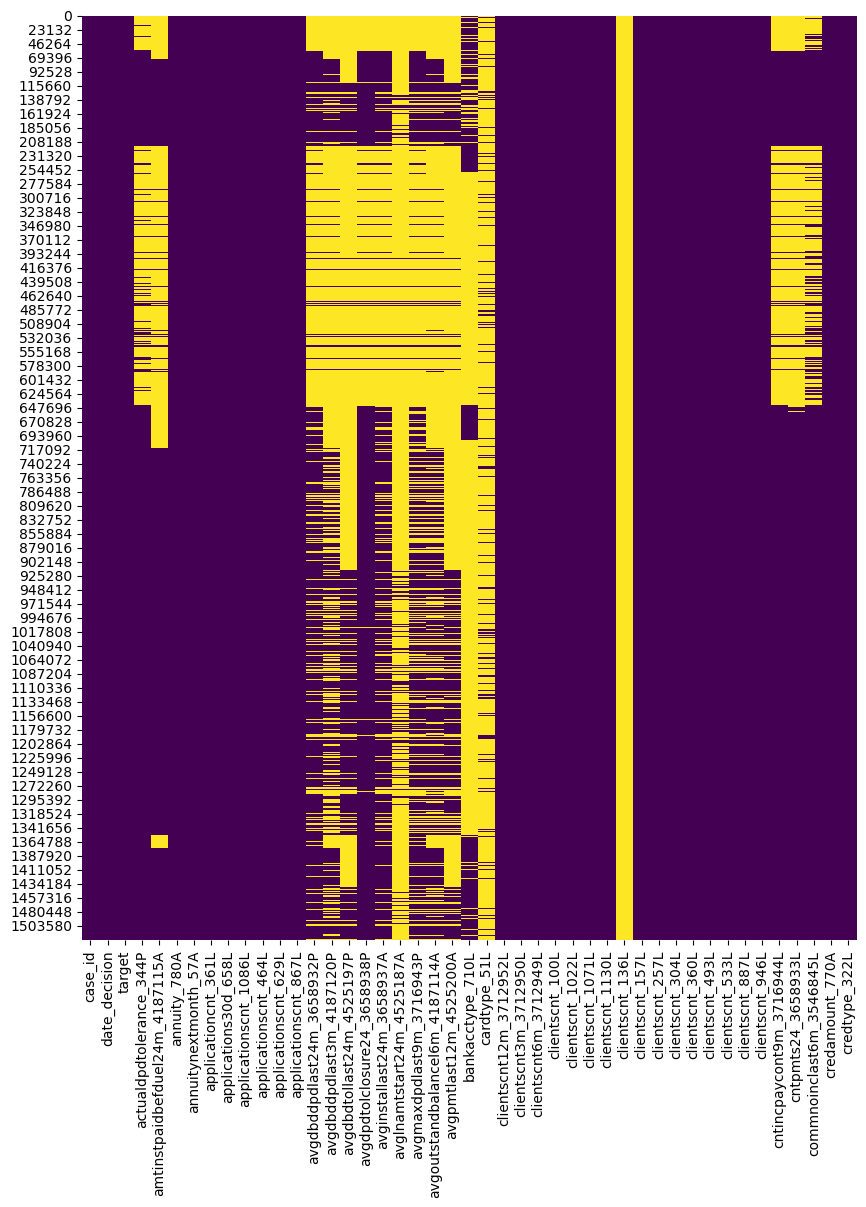

In [8]:
plt.figure(figsize=(10,12))
sns.heatmap(static_df.iloc[:,0:45].isnull(),cbar=False,cmap='viridis') # Yellow corresponds to missing values

<Axes: >

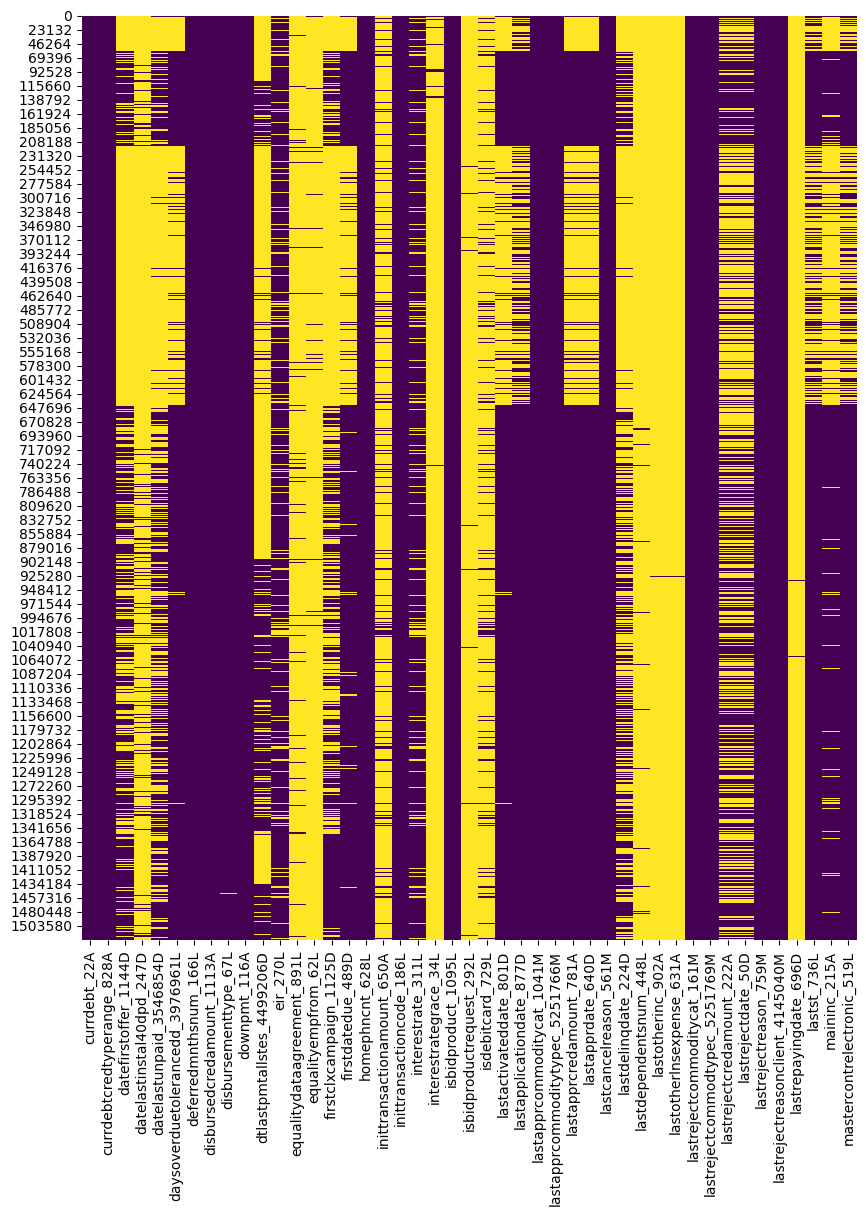

In [17]:
plt.figure(figsize=(10,12))
sns.heatmap(static_df.iloc[:,45:90].isnull(),cbar=False,cmap='viridis')

In [37]:
""" Too many missing values in the features:
'datelastinstal40dpd_247D', 'equalitydataa"""
static_df['datelastinstal40dpd_247D'].isnull().sum()

1392841

<Axes: >

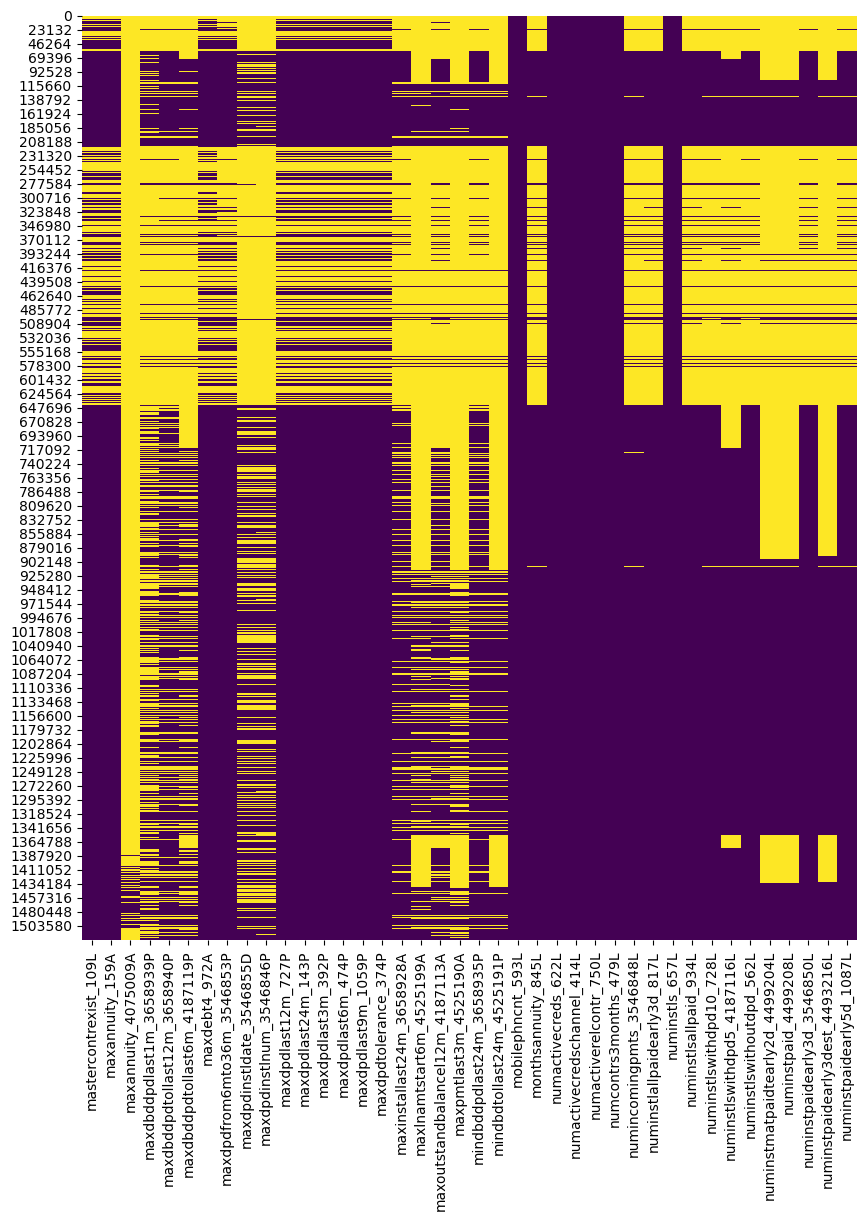

In [18]:
plt.figure(figsize=(10,11))
sns.heatmap(static_df.iloc[:,90:130].isnull(),cbar=False,cmap='viridis')

<Axes: >

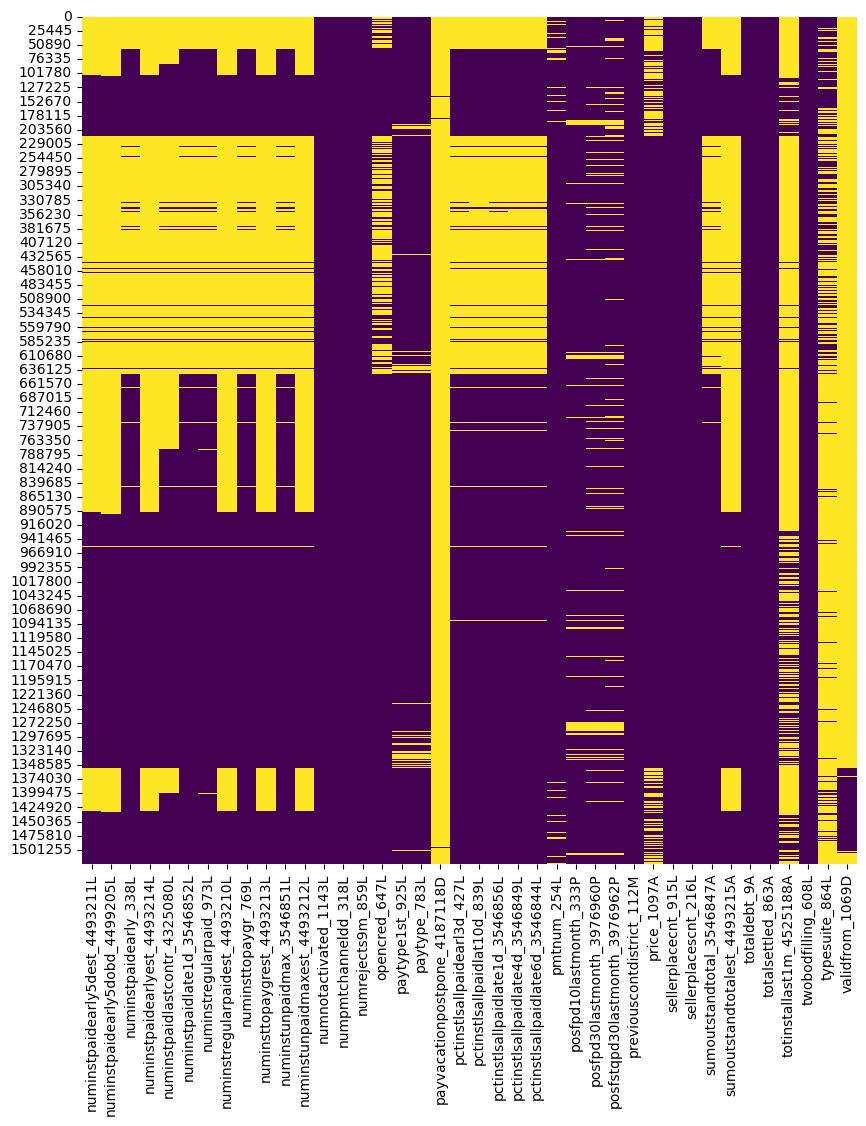

In [19]:
plt.figure(figsize=(10,11))
sns.heatmap(static_df.iloc[:,130:].isnull(),cbar=False,cmap='viridis')

### List of columns having null values over 60% 

In [7]:
# Columns with null values percentage over 0.6
cols = static_df.columns.tolist()
for col in cols:
    x = static_df[col].isnull().sum()
    if x/static_df.shape[0] > 0.6:
        print(col)

avgdbddpdlast3m_4187120P
avgdbdtollast24m_4525197P
avglnamtstart24m_4525187A
avgpmtlast12m_4525200A
bankacctype_710L
cardtype_51L
clientscnt_136L
datelastinstal40dpd_247D
dtlastpmtallstes_4499206D
equalitydataagreement_891L
equalityempfrom_62L
inittransactionamount_650A
interestrategrace_34L
isbidproductrequest_292L
isdebitcard_729L
lastdelinqdate_224D
lastdependentsnum_448L
lastotherinc_902A
lastotherlnsexpense_631A
lastrepayingdate_696D
maxannuity_4075009A
maxdbddpdlast1m_3658939P
maxlnamtstart6m_4525199A
maxpmtlast3m_4525190A
mindbdtollast24m_4525191P
payvacationpostpone_4187118D
totinstallast1m_4525188A
typesuite_864L
validfrom_1069D


## Correlation between numerical features

In [8]:
# Numerical columns
static_num_cols = static_df.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns.tolist()

In [9]:
# Correlation object
corr = static_df[static_num_cols].corr()

In [61]:
# Picking up "Nan" valued correlation rows
corr[corr.isna().all(axis=1)]

case_id  actualdpdtolerance_344P  \
commnoinclast6m_3546845L        NaN                      NaN   
deferredmnthsnum_166L           NaN                      NaN   
interestrategrace_34L           NaN                      NaN   
mastercontrelectronic_519L      NaN                      NaN   
mastercontrexist_109L           NaN                      NaN   

                            amtinstpaidbefduel24m_4187115A  annuity_780A  \
commnoinclast6m_3546845L                               NaN           NaN   
deferredmnthsnum_166L                                  NaN           NaN   
interestrategrace_34L                                  NaN           NaN   
mastercontrelectronic_519L                             NaN           NaN   
mastercontrexist_109L                                  NaN           NaN   

                            annuitynextmonth_57A  applicationcnt_361L  \
commnoinclast6m_3546845L                     NaN                  NaN   
deferredmnthsnum_166L                        NaN                  NaN   
interestrategrace_34L                        NaN                  NaN   
mastercontrelectronic_519L                   NaN                  NaN   
mastercontrexist_109L                        NaN                  NaN   

                            applications30d_658L  applicationscnt_1086L  \
commnoinclast6m_3546845L                     NaN                    NaN   
deferredmnthsnum_166L                        NaN                    NaN   
interestrategrace_34L                        NaN                    NaN   
mastercontrelectronic_519L                   NaN                    NaN   
mastercontrexist_109L                        NaN                    NaN   

                            applicationscnt_464L  applicationscnt_629L  ...  \
commnoinclast6m_3546845L                     NaN                   NaN  ...   
deferredmnthsnum_166L                        NaN                   NaN  ...   
interestrategrace_34L                        NaN                   NaN  ...   
mastercontrelectronic_519L                   NaN                   NaN  ...   
mastercontrexist_109L                        NaN                   NaN  ...   

                            posfpd30lastmonth_3976960P  \
commnoinclast6m_3546845L                           NaN   
deferredmnthsnum_166L                              NaN   
interestrategrace_34L                              NaN   
mastercontrelectronic_519L                         NaN   
mastercontrexist_109L                              NaN   

                            posfstqpd30lastmonth_3976962P  price_1097A  \
commnoinclast6m_3546845L                              NaN          NaN   
deferredmnthsnum_166L                                 NaN          NaN   
interestrategrace_34L                                 NaN          NaN   
mastercontrelectronic_519L                            NaN          NaN   
mastercontrexist_109L                                 NaN          NaN   

                            sellerplacecnt_915L  sellerplacescnt_216L  \
commnoinclast6m_3546845L                    NaN                   NaN   
deferredmnthsnum_166L                       NaN                   NaN   
interestrategrace_34L                       NaN                   NaN   
mastercontrelectronic_519L                  NaN                   NaN   
mastercontrexist_109L                       NaN                   NaN   

                            sumoutstandtotal_3546847A  \
commnoinclast6m_3546845L                          NaN   
deferredmnthsnum_166L                             NaN   
interestrategrace_34L                             NaN   
mastercontrelectronic_519L                        NaN   
mastercontrexist_109L                             NaN   

                            sumoutstandtotalest_4493215A  totaldebt_9A  \
commnoinclast6m_3546845L                             NaN           NaN   
deferredmnthsnum_166L                                NaN           NaN   
interestrategrace_34L  

In [10]:
nan_rows=corr[corr.isna().all(axis=1)].index.tolist()
corr.drop(nan_rows)

case_id  actualdpdtolerance_344P  \
case_id                         1.000000                -0.010575   
actualdpdtolerance_344P        -0.010575                 1.000000   
amtinstpaidbefduel24m_4187115A -0.051312                -0.003202   
annuity_780A                    0.101809                -0.002787   
annuitynextmonth_57A            0.093293                -0.002733   
...                                  ...                      ...   
sumoutstandtotal_3546847A      -0.151606                 0.005869   
sumoutstandtotalest_4493215A   -0.172527                 0.006774   
totaldebt_9A                    0.006959                 0.005901   
totalsettled_863A               0.170597                -0.000363   
totinstallast1m_4525188A       -0.052069                 0.055987   

                                amtinstpaidbefduel24m_4187115A  annuity_780A  \
case_id                                              -0.051312      0.101809   
actualdpdtolerance_344P                              -0.003202     -0.002787   
amtinstpaidbefduel24m_4187115A                        1.000000      0.197963   
annuity_780A                                          0.197963      1.000000   
annuitynextmonth_57A                                  0.497086      0.101330   
...                                                        ...           ...   
sumoutstandtotal_3546847A                             0.447947      0.033271   
sumoutstandtotalest_4493215A                          0.443401      0.026365   
totaldebt_9A                                          0.445662      0.046566   
totalsettled_863A                                     0.645103      0.155481   
totinstallast1m_4525188A                              0.419541      0.141597   

                                annuitynextmonth_57A  applicationcnt_361L  \
case_id                                     0.093293            -0.002643   
actualdpdtolerance_344P                    -0.002733            -0.000011   
amtinstpaidbefduel24m_4187115A              0.497086             0.000058   
annuity_780A                                0.101330             0.001191   
annuitynextmonth_57A                        1.000000            -0.001359   
...                                              ...                  ...   
sumoutstandtotal_3546847A                   0.733215            -0.000701   
sumoutstandtotalest_4493215A                0.735703            -0.000565   
totaldebt_9A                                0.754967            -0.001006   
totalsettled_863A                           0.420836            -0.000988   
totinstallast1m_4525188A                    0.158657            -0.000493   

                                applications30d_658L  applicationscnt_1086L  \
case_id                                    -0.046445              -0.015819   
actualdpdtolerance_344P                     0.001529              -0.000859   
amtinstpaidbefduel24m_4187115A              0.052968               0.099632   
annuity_780A                                0.015250               0.035293   
annuitynextmonth_57A                        0.122024               0.079678   
...                                              ...                    ...   
sumoutstandtotal_3546847A                   0.086153               0.069243   
sumoutstandtotalest_4493215A                0.093966               0.066140   
totaldebt_9A                                0.112809               0.077023   
totalsettled_863A                           0.077037               0.119815   
totinstallast1m_4525188A                    0.084179               0.027510   

                                applicationscnt_464L  applicationscnt_629L  \
case_id                                    -0.072036             -0.071093   
actualdpdtolerance_344P                     0.007023              0.004855   
amtinstpaidbefduel24m_4187115A             -0.004874             -0.005018   
annuity_780A                               -0.021726     

In [11]:
# Non-nan columns of correlation object as list
corr_cols = corr.columns.tolist()
for i in nan_rows:
    corr_cols.remove(i)
    print(i)

commnoinclast6m_3546845L
deferredmnthsnum_166L
interestrategrace_34L
mastercontrelectronic_519L
mastercontrexist_109L


### Correlation heatmaps

<Axes: >

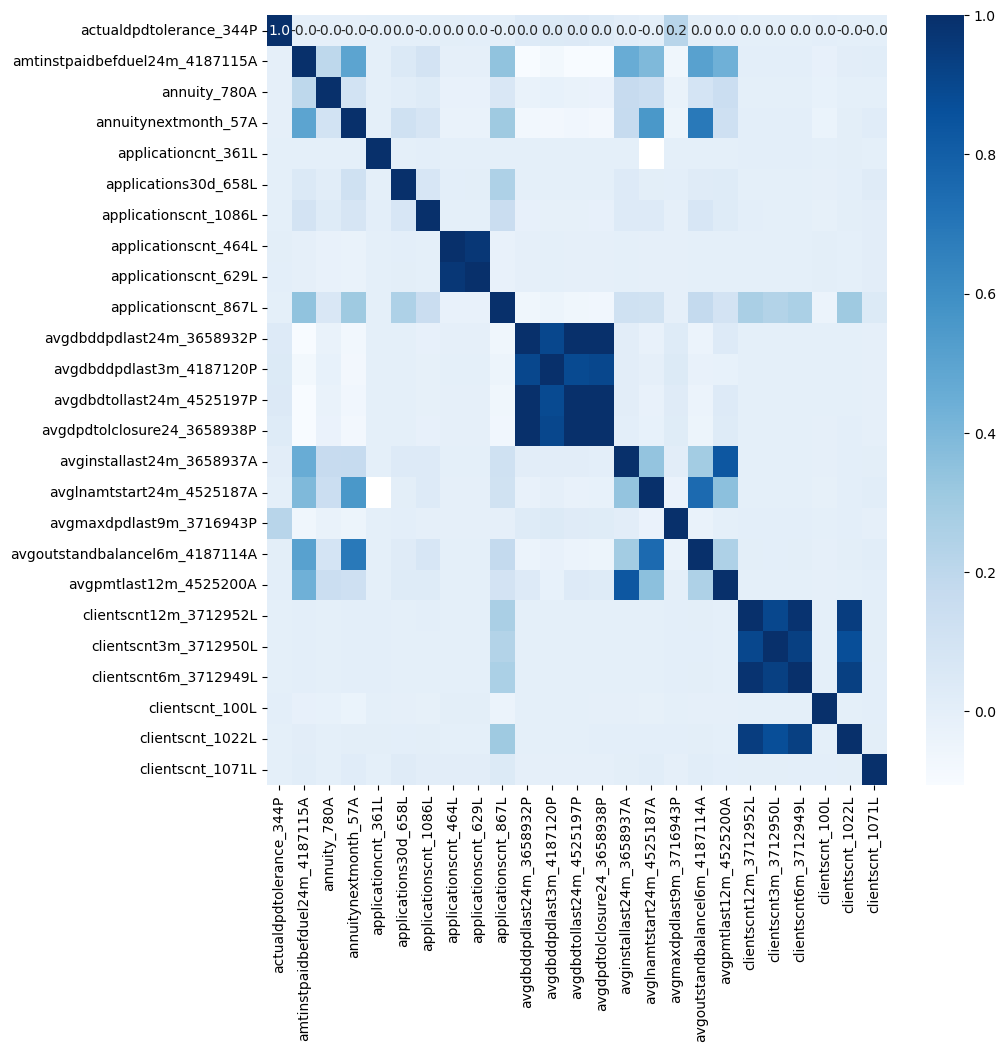

In [72]:
plt.figure(figsize=(10,10))
sns.heatmap(corr[corr_cols[1:26]][1:26],cbar=True,annot=True,fmt='.1f',cmap='Blues') # col 1~43, row 1~43

<Axes: >

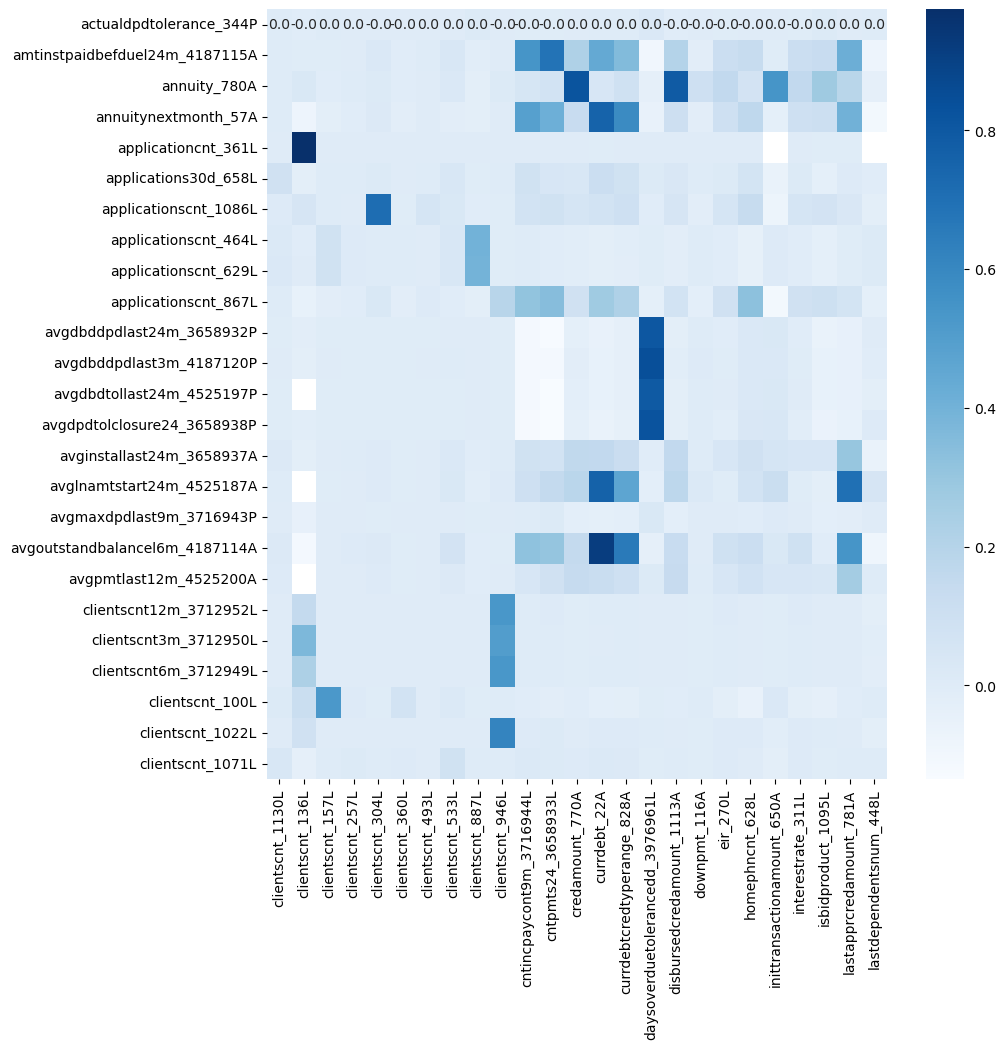

In [73]:
plt.figure(figsize=(10,10))
sns.heatmap(corr[corr_cols[26:51]][1:26],cbar=True,annot=True,fmt='.1f',cmap='Blues')

<Axes: >

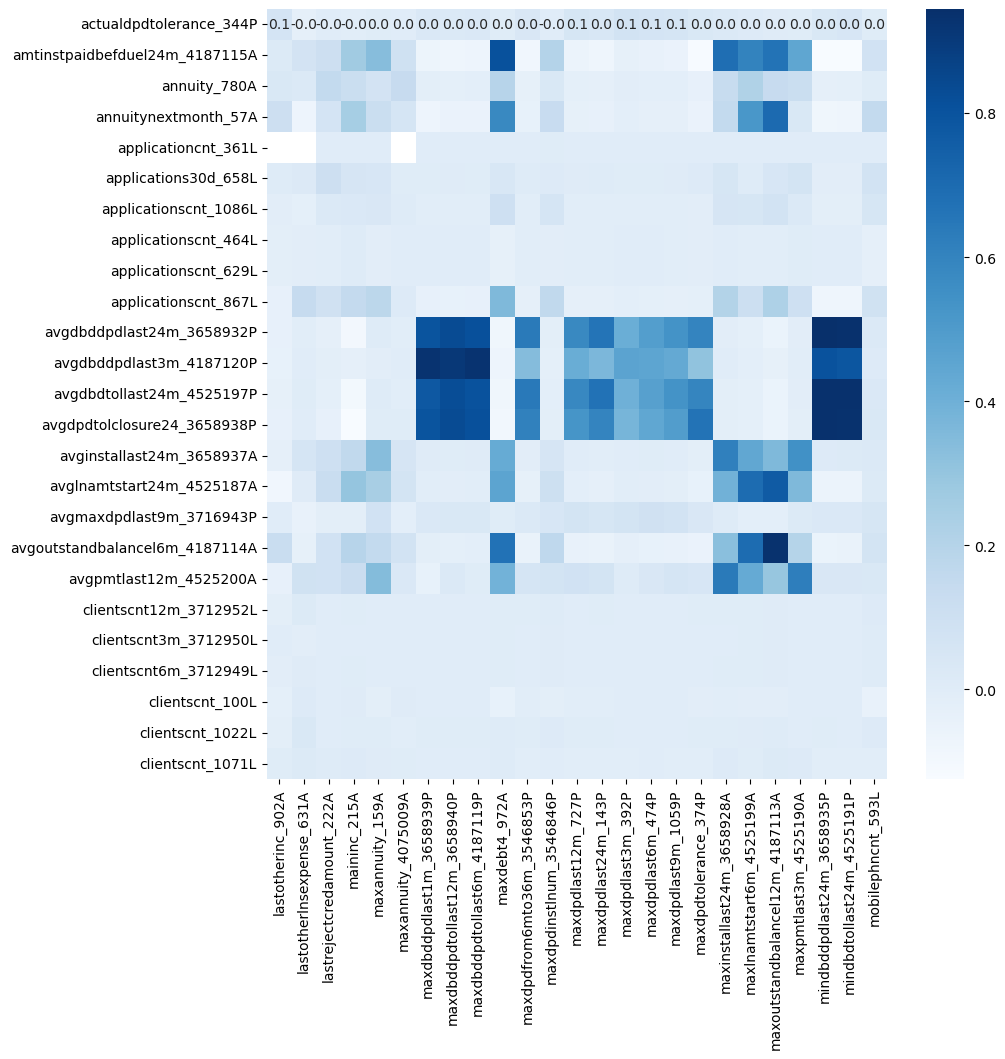

In [74]:
plt.figure(figsize=(10,10))
sns.heatmap(corr[corr_cols[51:76]][1:26],cbar=True,annot=True,fmt='.1f',cmap='Blues')

<Axes: >

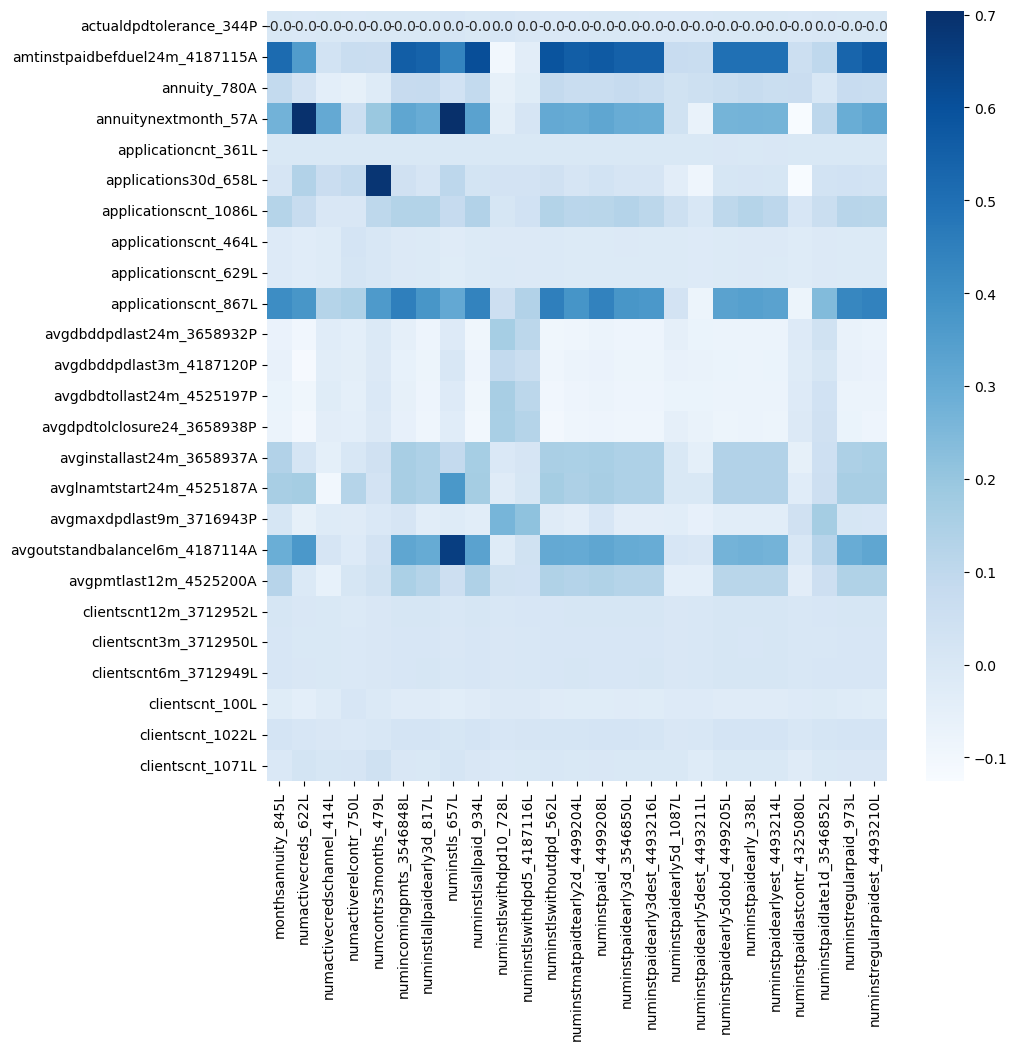

In [75]:
plt.figure(figsize=(10,10))
sns.heatmap(corr[corr_cols[76:101]][1:26],cbar=True,annot=True,fmt='.1f',cmap='Blues')

<Axes: >

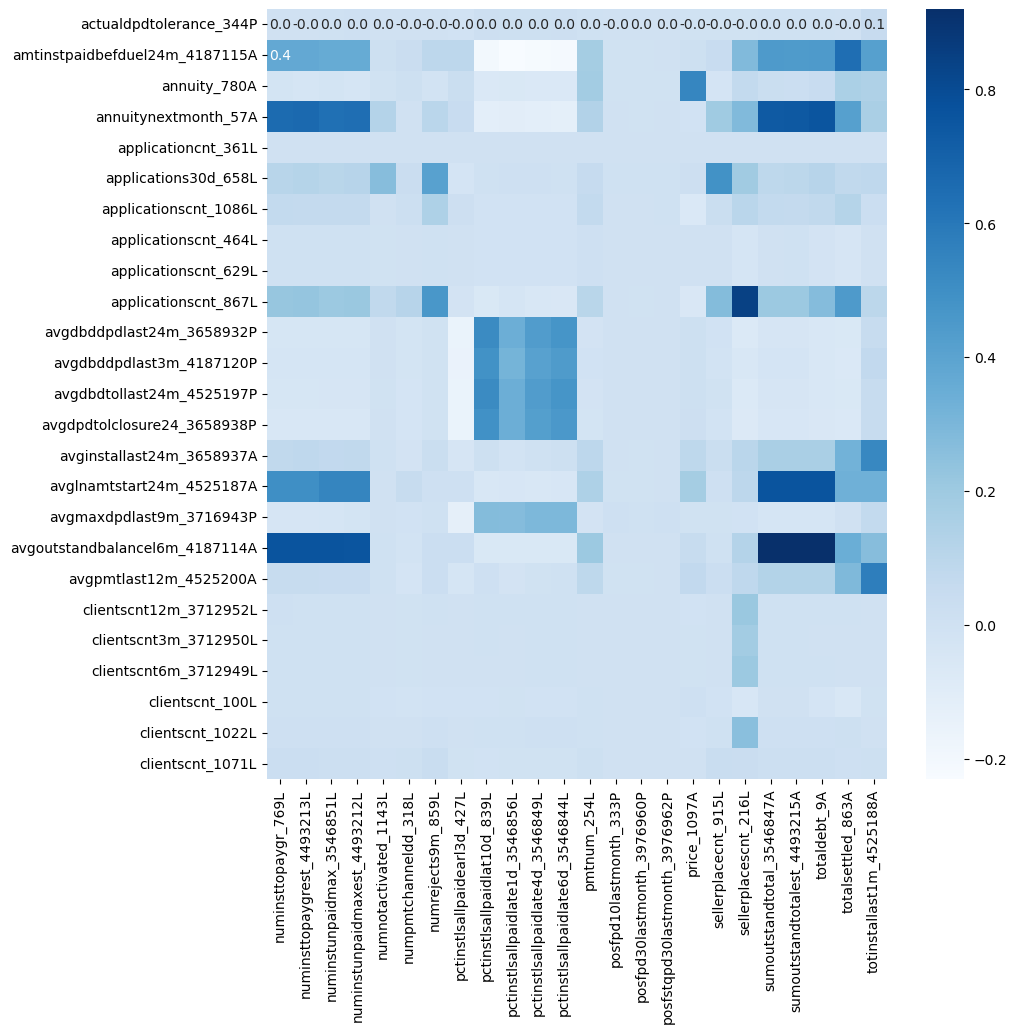

In [76]:
plt.figure(figsize=(10,10))
sns.heatmap(corr[corr_cols[101:125]][1:26],cbar=True,annot=True,fmt='.1f',cmap='Blues')

### Table of features with high correlation

In [28]:
# Table of correlation values over 0.5
from tabulate import tabulate
table = []
for i in range(1,len(corr_cols)):
    for j in range(i+1,len(corr_cols)):
        if abs(corr[corr_cols[i]][corr_cols[j]]) > 0.7:
            table.append([ corr_cols[i],corr_cols[j], corr[corr_cols[i]][corr_cols[j]] ])

print(tabulate(table, tablefmt='fancy_grid'))

╒═════════════════════════════════╤═════════════════════════════════╤══════════╕
│ amtinstpaidbefduel24m_4187115A  │ maxdebt4_972A                   │ 0.810089 │
├─────────────────────────────────┼─────────────────────────────────┼──────────┤
│ annuity_780A                    │ credamount_770A                 │ 0.819523 │
├─────────────────────────────────┼─────────────────────────────────┼──────────┤
│ annuity_780A                    │ disbursedcredamount_1113A       │ 0.792212 │
├─────────────────────────────────┼─────────────────────────────────┼──────────┤
│ annuitynextmonth_57A            │ currdebt_22A                    │ 0.754995 │
├─────────────────────────────────┼─────────────────────────────────┼──────────┤
│ annuitynextmonth_57A            │ maxoutstandbalancel12m_4187113A │ 0.705812 │
├─────────────────────────────────┼─────────────────────────────────┼──────────┤
│ annuitynextmonth_57A            │ numinstls_657L                  │ 0.703783 │
├───────────────────────────

### Distribution plots between highly correlated features

In [16]:
static_df_1 = static_df.replace([np.inf, -np.inf], np.nan)
    
static_df_1

case_id date_decision  target  actualdpdtolerance_344P  \
0              0    2019-01-03       0                      NaN   
1              1    2019-01-03       0                      NaN   
2              2    2019-01-04       0                      NaN   
3              3    2019-01-03       0                      NaN   
4              4    2019-01-04       1                      NaN   
...          ...           ...     ...                      ...   
1526654  2703450    2020-10-05       0                      0.0   
1526655  2703451    2020-10-05       0                      0.0   
1526656  2703452    2020-10-05       0                      0.0   
1526657  2703453    2020-10-05       0                      0.0   
1526658  2703454    2020-10-05       0                      0.0   

         amtinstpaidbefduel24m_4187115A  annuity_780A  annuitynextmonth_57A  \
0                                   NaN   1917.599976              0.000000   
1                                   NaN   3134.000000              0.000000   
2                                   NaN   4937.000000              0.000000   
3                                   NaN   4643.600098              0.000000   
4                                   NaN   3390.199951              0.000000   
...                                 ...           ...                   ...   
1526654                   176561.359375   3675.400146              0.000000   
1526655                   301276.468750   7088.600098           6191.600098   
1526656                    14232.400391   7788.800293              0.000000   
1526657                   197371.578125   1195.400024           2827.199951   
1526658                    82949.601562   4533.800293           2986.800049   

         applicationcnt_361L  applications30d_658L  applicationscnt_1086L  \
0                        0.0                   0.0                    0.0   
1                        0.0                   0.0                    0.0   
2                        0.0                   0.0                    0.0   
3                        0.0                   1.0                    0.0   
4                        0.0                   1.0                    0.0   
...                      ...                   ...                    ...   
1526654                  0.0                   0.0                    0.0   
1526655                  0.0                   0.0                    5.0   
1526656                  0.0                   0.0                    0.0   
1526657                  0.0                   0.0                   36.0   
1526658                  0.0                   0.0                    0.0   

         ...  sellerplacecnt_915L  sellerplacescnt_216L  \
0        ...                  0.0                   0.0   
1        ...                  0.0                   0.0   
2        ...                  0.0                   0.0   
3        ...                  1.0                   1.0   
4        ...                  0.0                   0.0   
...      ...                  ...                   ...   
1526654  ...                  0.0                   8.0   
1526655  ...                  0.0                   3.0   
1526656  ...                  0.0                   1.0   
1526657  ...                  0.0                   4.0   
1526658  ...                  0.0                   0.0   

         sumoutstandtotal_3546847A  sumoutstandtotalest_4493215A  \
0                              NaN                           NaN   
1                              NaN                           NaN   
2                              NaN                           NaN   
3                              NaN                           NaN   
4                              NaN                           NaN   
...                            ...                           ...   
1526654                   0.000000                      0.000000   
1526655               68098.398438                  68098.398438   
1526656  

In [35]:
# Target density function on the given features 
def plot_distribution(df, Corr_list):
    i = 0
    t1 = df.loc[df['target'] != 0]
    t0 = df.loc[df['target'] == 0]

    sns.set_style('whitegrid')
    fig, ax = plt.subplots(10, 2, figsize=(5,25))

    for feature_list in Corr_list:
        i += 1
        plt.subplot(10, 2, i)
        #plt.title(f"{feature_list[0]} \n {feature_list[1]}", fontsize = 8)
        plt.ylabel('Default distributions', fontsize=8)
        plt.xlabel(f"{feature_list[0]} \n {feature_list[1]}", fontsize = 6)
        j = 0
        for feature in feature_list:
            j += 1
            sns.kdeplot(t1[feature], bw_method=0.5, label = 'feature %i' %j)
        plt.legend(loc='upper right', fontsize = "6")

        i += 1
        plt.subplot(10, 2, i)
        #plt.title(f"{feature_list[0]} \n {feature_list[1]}", fontsize = 8)
        plt.ylabel('Target=0 distributions', fontsize=8)
        plt.xlabel(f"{feature_list[0]} \n {feature_list[1]}", fontsize = 6)
        j = 0
        for feature in feature_list:
            j += 1
            sns.kdeplot(t0[feature], bw_method=0.5, label = 'feature %i' %j)
        plt.legend(loc='upper right', fontsize = "6")

    plt.tight_layout()  # Adjust the spacing between subplots
    plt.show()

C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1479: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1013: RuntimeWarning: invalid value encountered in scalar divide
  result = sqr.sum(axis=axis, dtype=np.float64) / d
C:\Users\0913h\AppData\Local\Temp\ipykernel_11416\3455539233.py:30: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(t0[feature], bw_method=0.5, label = 'feature %i' %j)


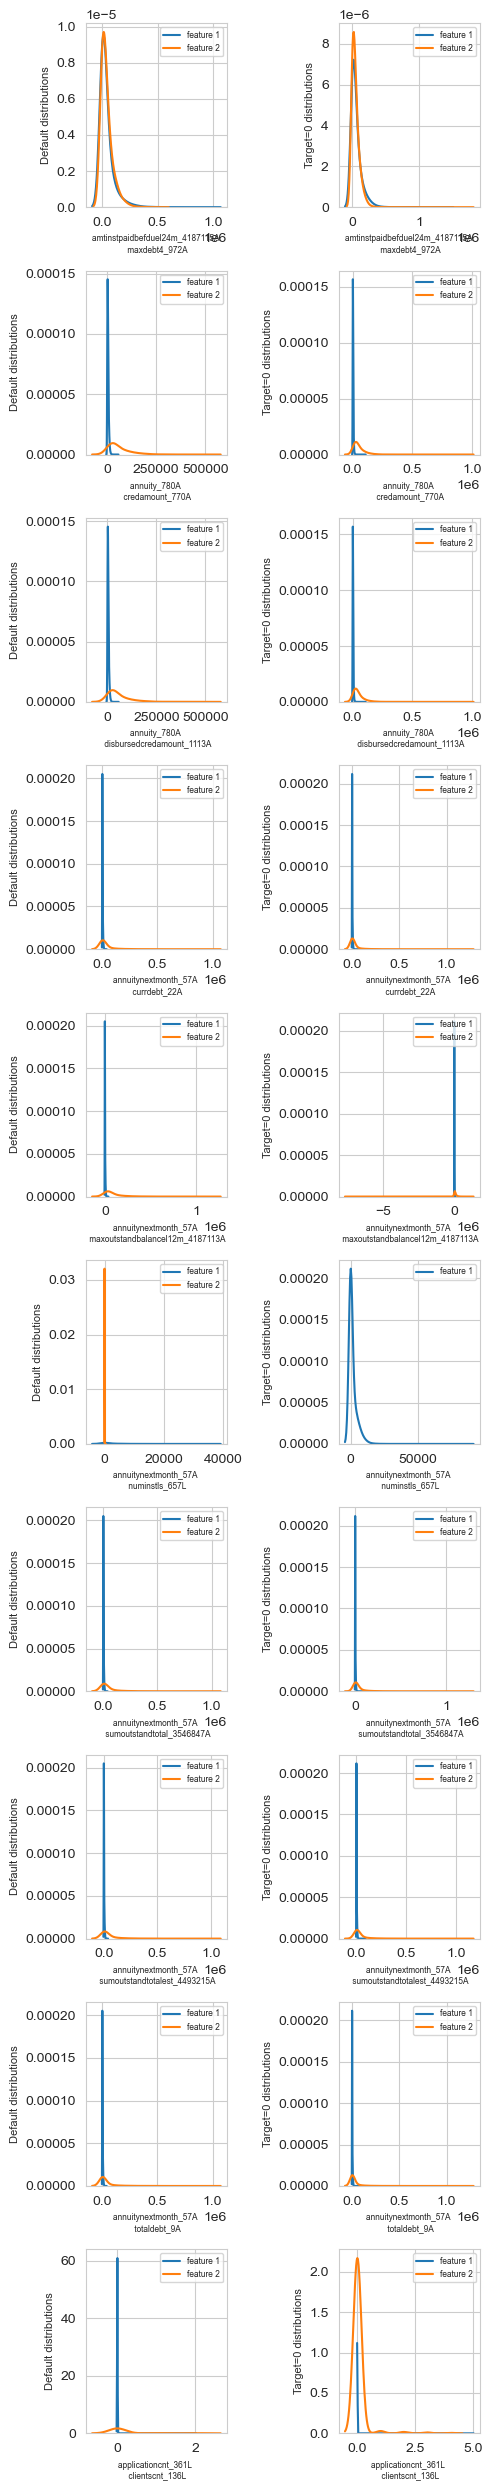

In [36]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Creating correlated columns list
i = 0
coco_list = []
for i in range(10):
    coco_list.append(table[i][0:2])

plot_distribution(static_df_1,coco_list)

C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1479: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1013: RuntimeWarning: invalid value encountered in scalar divide
  result = sqr.sum(axis=axis, dtype=np.float64) / d
C:\Users\0913h\AppData\Local\Temp\ipykernel_11416\3455539233.py:30: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(t0[feature], bw_method=0.5, label = 'feature %i' %j)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1479: RuntimeWarning: overflow encoun

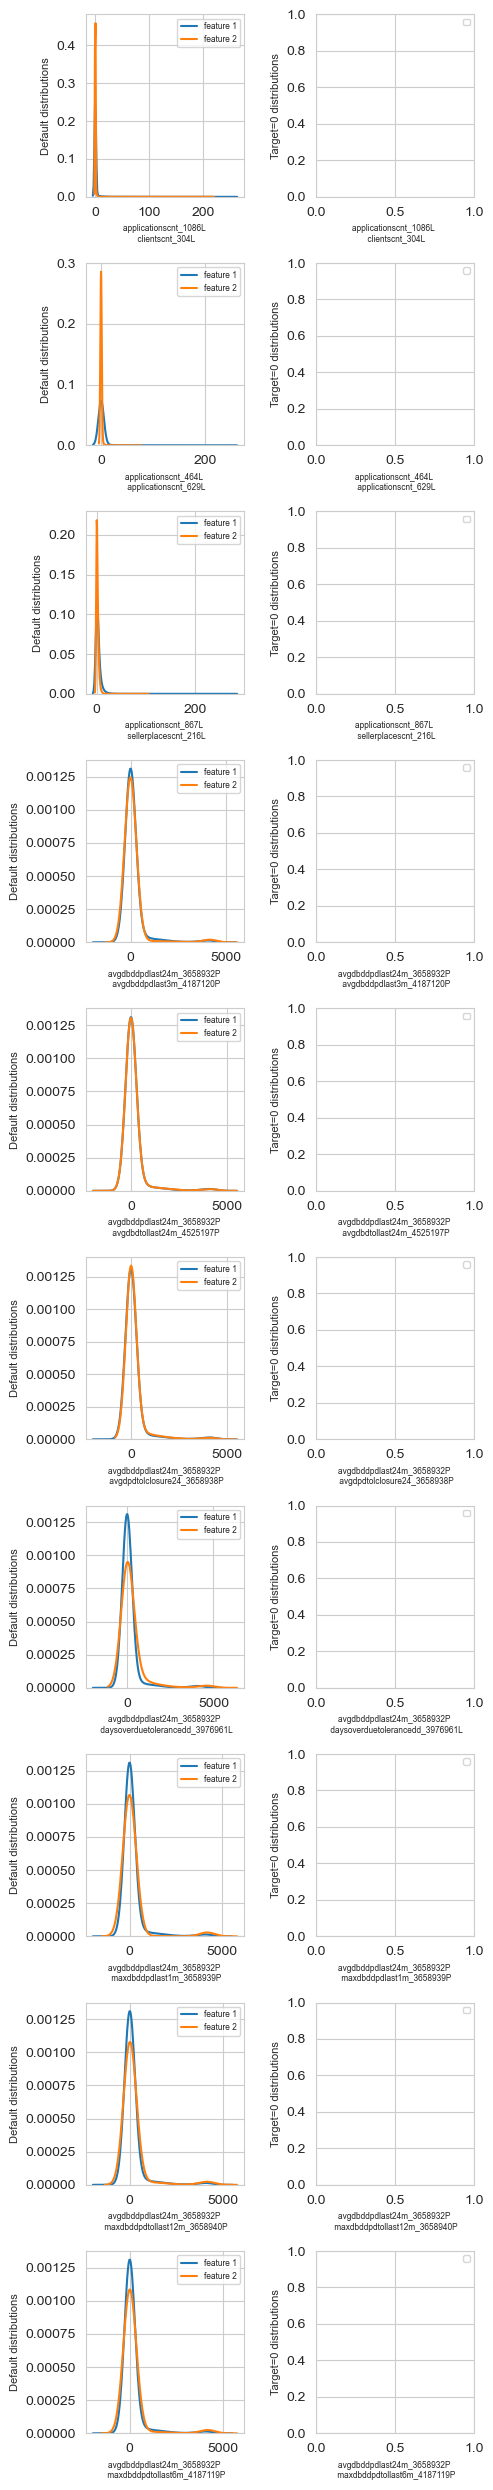

In [37]:
coco_list = []
for i in range(10, 20, 1):
    coco_list.append(table[i][0:2])

plot_distribution(static_df_1,coco_list)

C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1479: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1013: RuntimeWarning: invalid value encountered in scalar divide
  result = sqr.sum(axis=axis, dtype=np.float64) / d
C:\Users\0913h\AppData\Local\Temp\ipykernel_11416\3455539233.py:30: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.

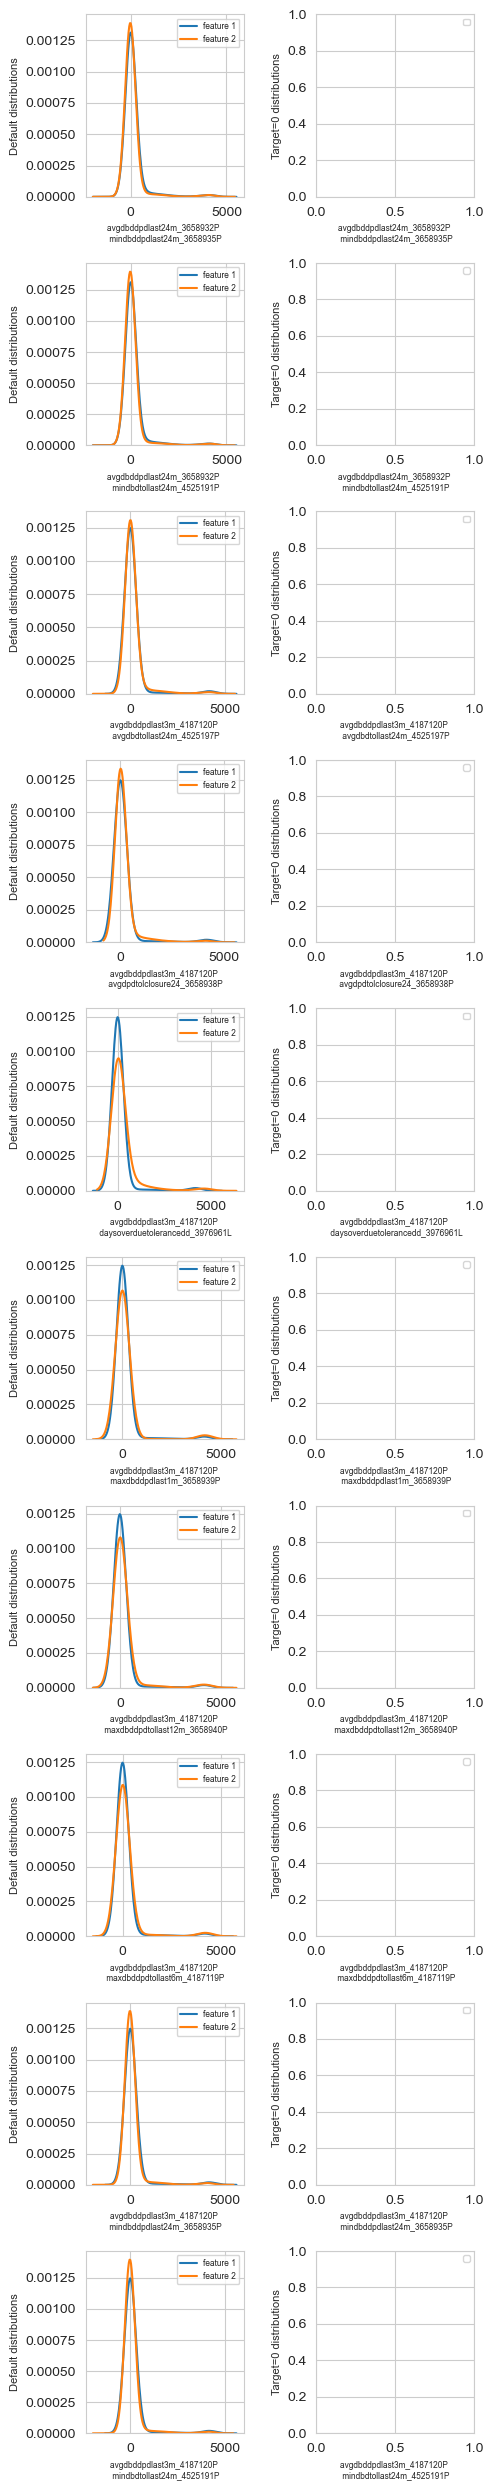

In [38]:
coco_list = []
for i in range(20, 30, 1):
    coco_list.append(table[i][0:2])

plot_distribution(static_df_1,coco_list)

C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1479: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1013: RuntimeWarning: invalid value encountered in scalar divide
  result = sqr.sum(axis=axis, dtype=np.float64) / d
C:\Users\0913h\AppData\Local\Temp\ipykernel_11416\3455539233.py:30: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.

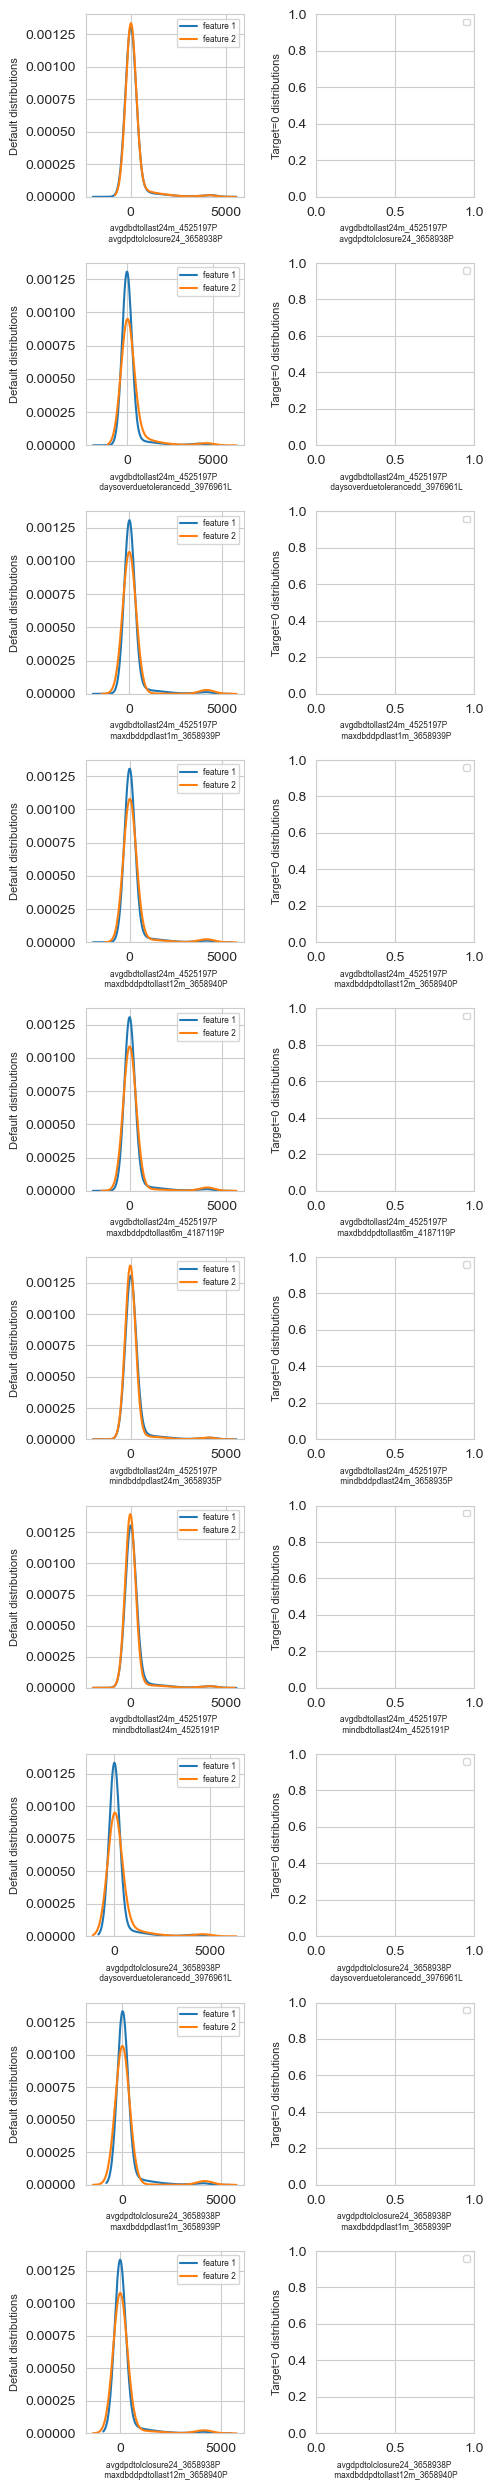

In [39]:
coco_list = []
for i in range(30, 40, 1):
    coco_list.append(table[i][0:2])

plot_distribution(static_df_1,coco_list)

C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1479: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1013: RuntimeWarning: invalid value encountered in scalar divide
  result = sqr.sum(axis=axis, dtype=np.float64) / d
C:\Users\0913h\AppData\Local\Temp\ipykernel_11416\3455539233.py:30: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.

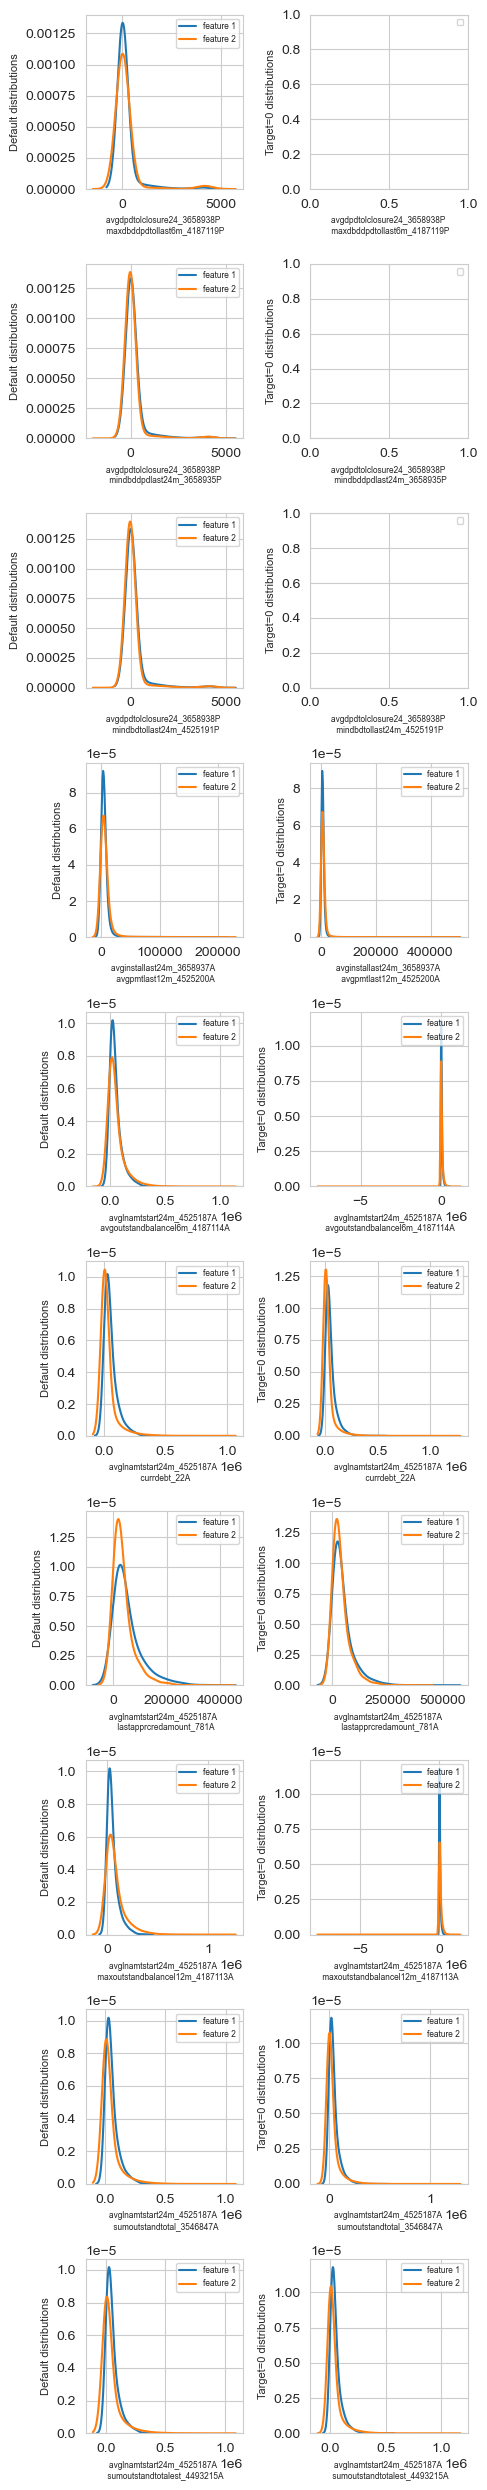

In [40]:
coco_list = []
for i in range(40, 50, 1):
    coco_list.append(table[i][0:2])

plot_distribution(static_df_1,coco_list)

C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1479: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\Users\0913h\AppData\Local\Temp\ipykernel_11416\3455539233.py:30: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(t0[feature], bw_method=0.5, label = 'feature %i' %j)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1479: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\Users\0913h\AppData\Local\Temp\ipykernel_11416\3455539233.py:30: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(t0[feature], bw_method=0.5, label = 'feature %i' %j)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1479: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\Users\0913h\AppData\Local\Temp\ipykernel_11416\3455539233.py:30: UserWarning: 

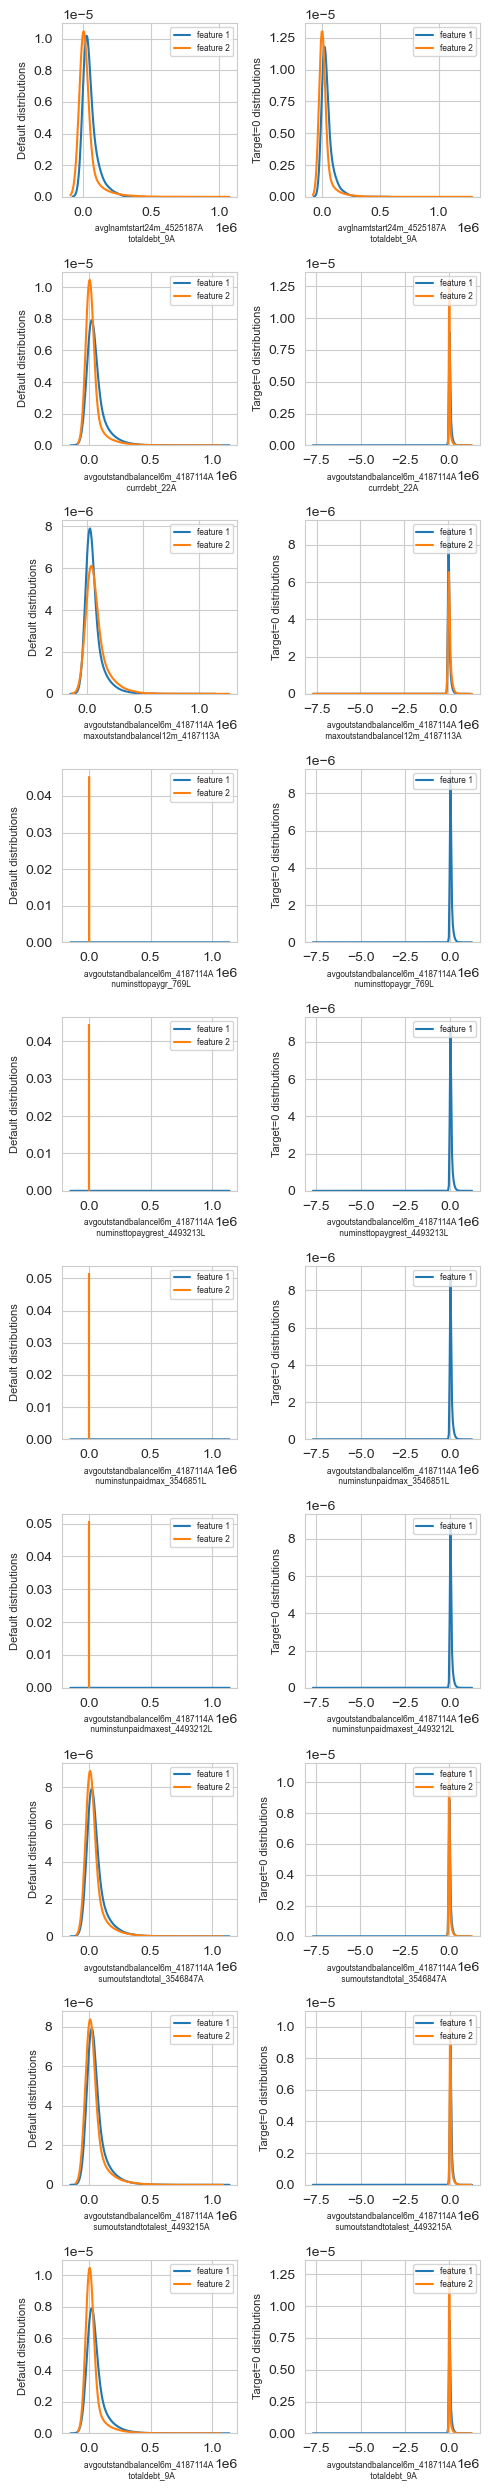

In [41]:
coco_list = []
for i in range(50, 60, 1):
    coco_list.append(table[i][0:2])

plot_distribution(static_df_1,coco_list)

C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1479: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\Users\0913h\AppData\Local\Temp\ipykernel_11416\3455539233.py:30: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(t0[feature], bw_method=0.5, label = 'feature %i' %j)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1479: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\Users\0913h\AppData\Local\Temp\ipykernel_11416\3455539233.py:30: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(t0[feature], bw_method=0.5, label = 'feature %i' %j)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.p

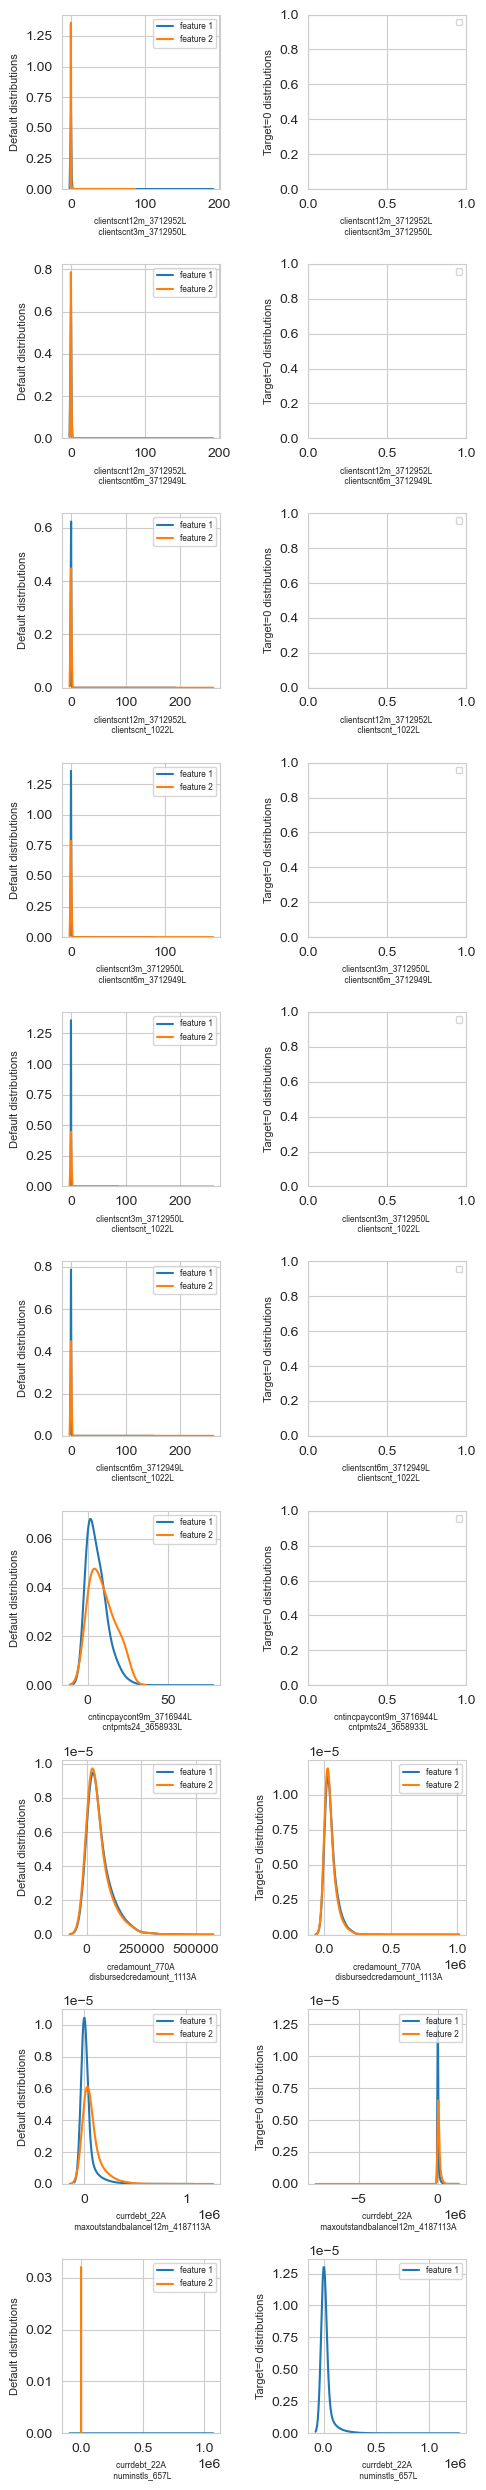

In [42]:
coco_list = []
for i in range(60, 70, 1):
    coco_list.append(table[i][0:2])

plot_distribution(static_df_1,coco_list)

C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1479: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\Users\0913h\AppData\Local\Temp\ipykernel_11416\3455539233.py:30: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(t0[feature], bw_method=0.5, label = 'feature %i' %j)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1479: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\Users\0913h\AppData\Local\Temp\ipykernel_11416\3455539233.py:30: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(t0[feature], bw_method=0.5, label = 'feature %i' %j)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1479: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\Users\0913h\AppData\Local\Temp\ipykernel_11416\3455539233.py:30: UserWarning: 

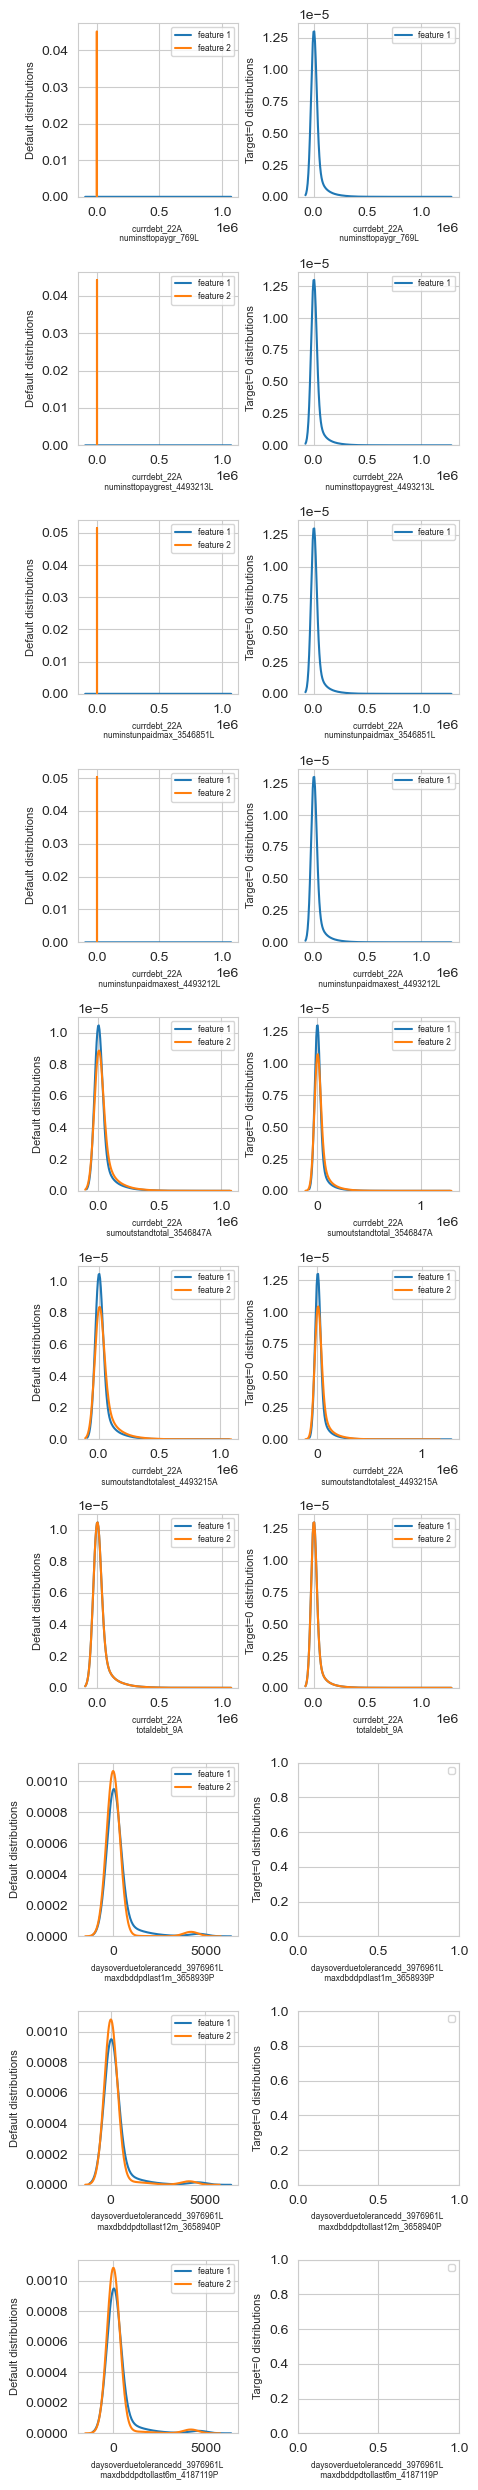

In [43]:
coco_list = []
for i in range(70, 80, 1):
    coco_list.append(table[i][0:2])

plot_distribution(static_df_1,coco_list)

C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1479: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\Users\0913h\AppData\Local\Temp\ipykernel_11416\3455539233.py:30: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(t0[feature], bw_method=0.5, label = 'feature %i' %j)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1479: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\Users\0913h\AppData\Local\Temp\ipykernel_11416\3455539233.py:30: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(t0[feature], bw_method=0.5, label = 'feature %i' %j)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.p

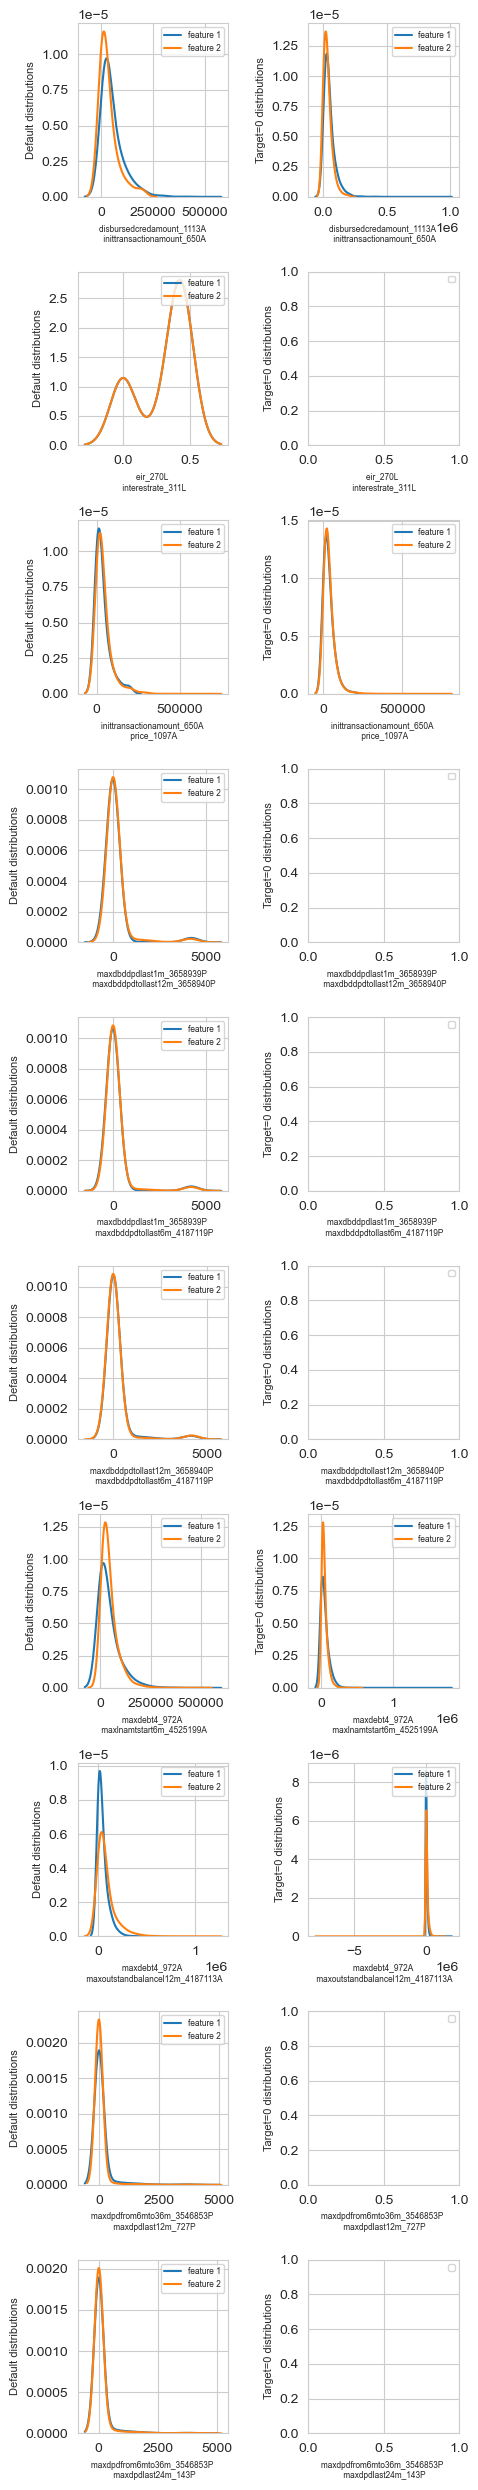

In [44]:
coco_list = []
for i in range(80, 90, 1):
    coco_list.append(table[i][0:2])

plot_distribution(static_df_1,coco_list)

C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1479: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1013: RuntimeWarning: invalid value encountered in scalar divide
  result = sqr.sum(axis=axis, dtype=np.float64) / d
C:\Users\0913h\AppData\Local\Temp\ipykernel_11416\3455539233.py:30: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.

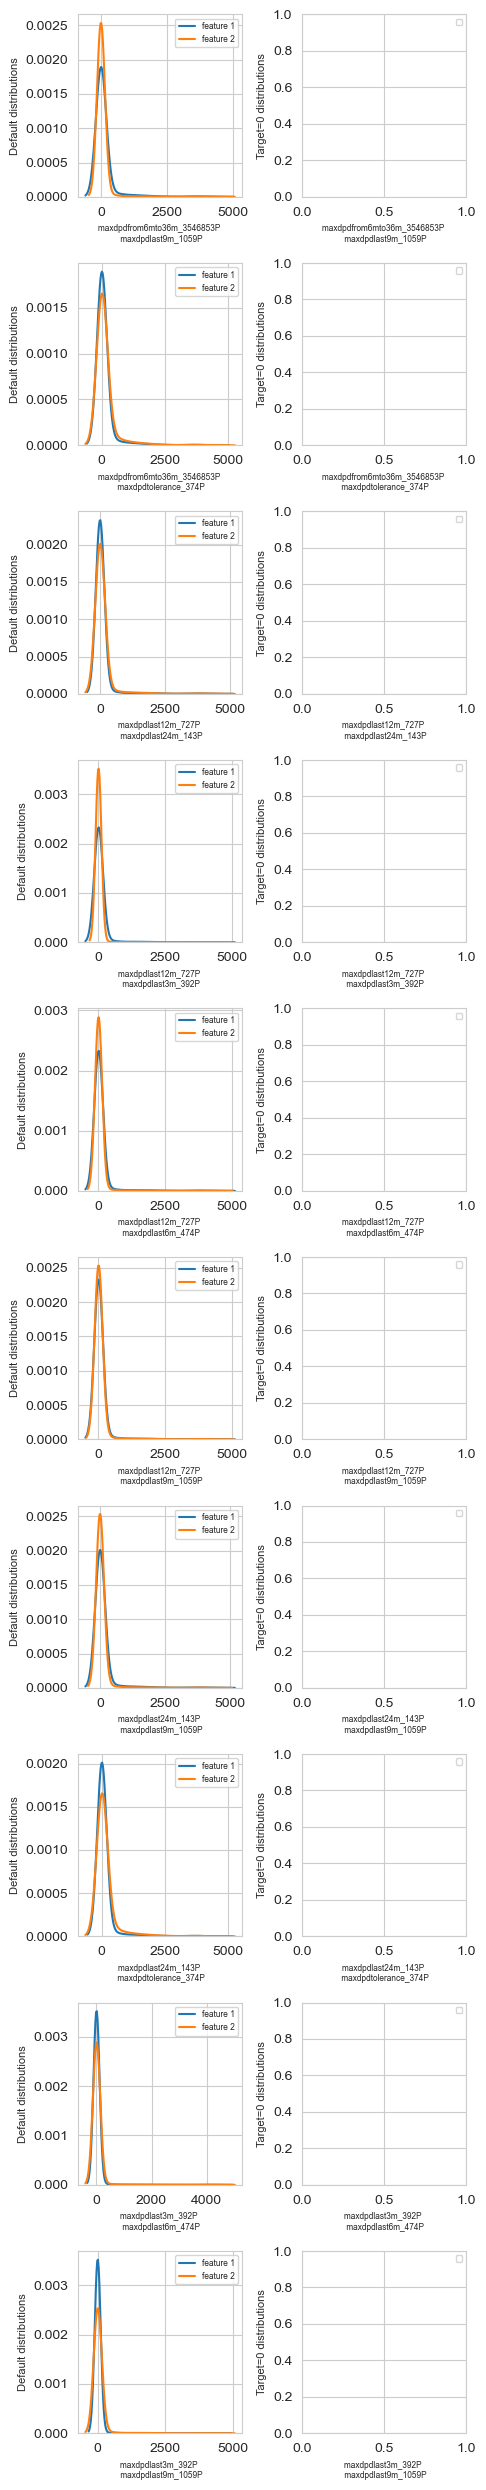

In [45]:
coco_list = []
for i in range(90, 100, 1):
    coco_list.append(table[i][0:2])

plot_distribution(static_df_1,coco_list)

C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1479: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1013: RuntimeWarning: invalid value encountered in scalar divide
  result = sqr.sum(axis=axis, dtype=np.float64) / d
C:\Users\0913h\AppData\Local\Temp\ipykernel_11416\3455539233.py:30: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.

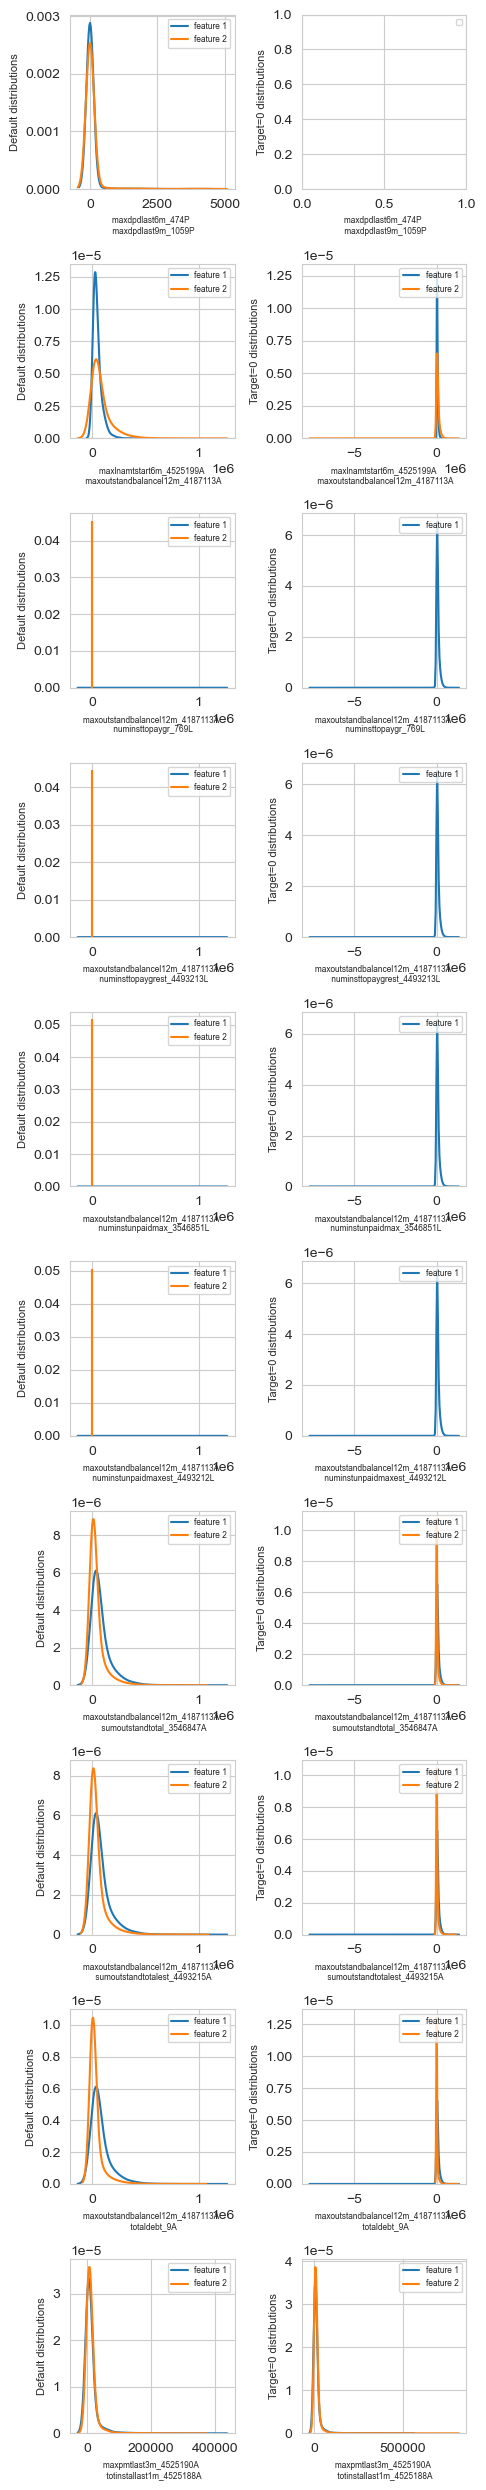

In [46]:
coco_list = []
for i in range(100, 110, 1):
    coco_list.append(table[i][0:2])

plot_distribution(static_df_1,coco_list)

C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1479: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1013: RuntimeWarning: invalid value encountered in scalar divide
  result = sqr.sum(axis=axis, dtype=np.float64) / d
C:\Users\0913h\AppData\Local\Temp\ipykernel_11416\3455539233.py:30: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.

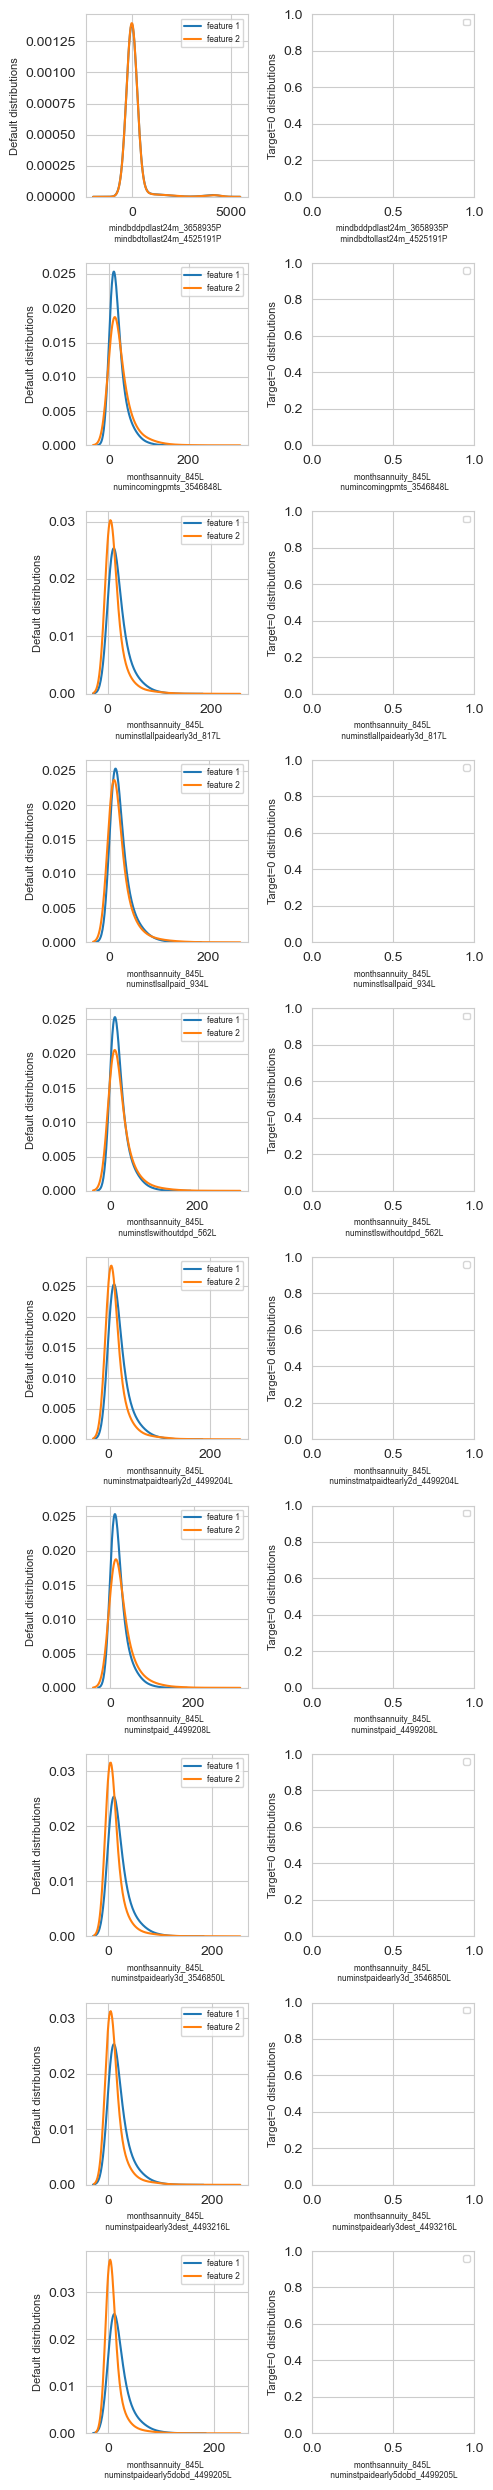

In [47]:
coco_list = []
for i in range(110, 120, 1):
    coco_list.append(table[i][0:2])

plot_distribution(static_df_1,coco_list)

C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1479: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\Users\0913h\AppData\Local\Temp\ipykernel_11416\3455539233.py:30: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(t0[feature], bw_method=0.5, label = 'feature %i' %j)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1479: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1013: RuntimeWarning: invalid value encountered in scalar divide
  result = sqr.sum(axis=axis, dtype=np.float64) / d
C:\Users\0913h\AppData\Local\Temp\ipykernel_11416\3455539233.py:30: UserWarning: Dataset has 0 variance; skipping density esti

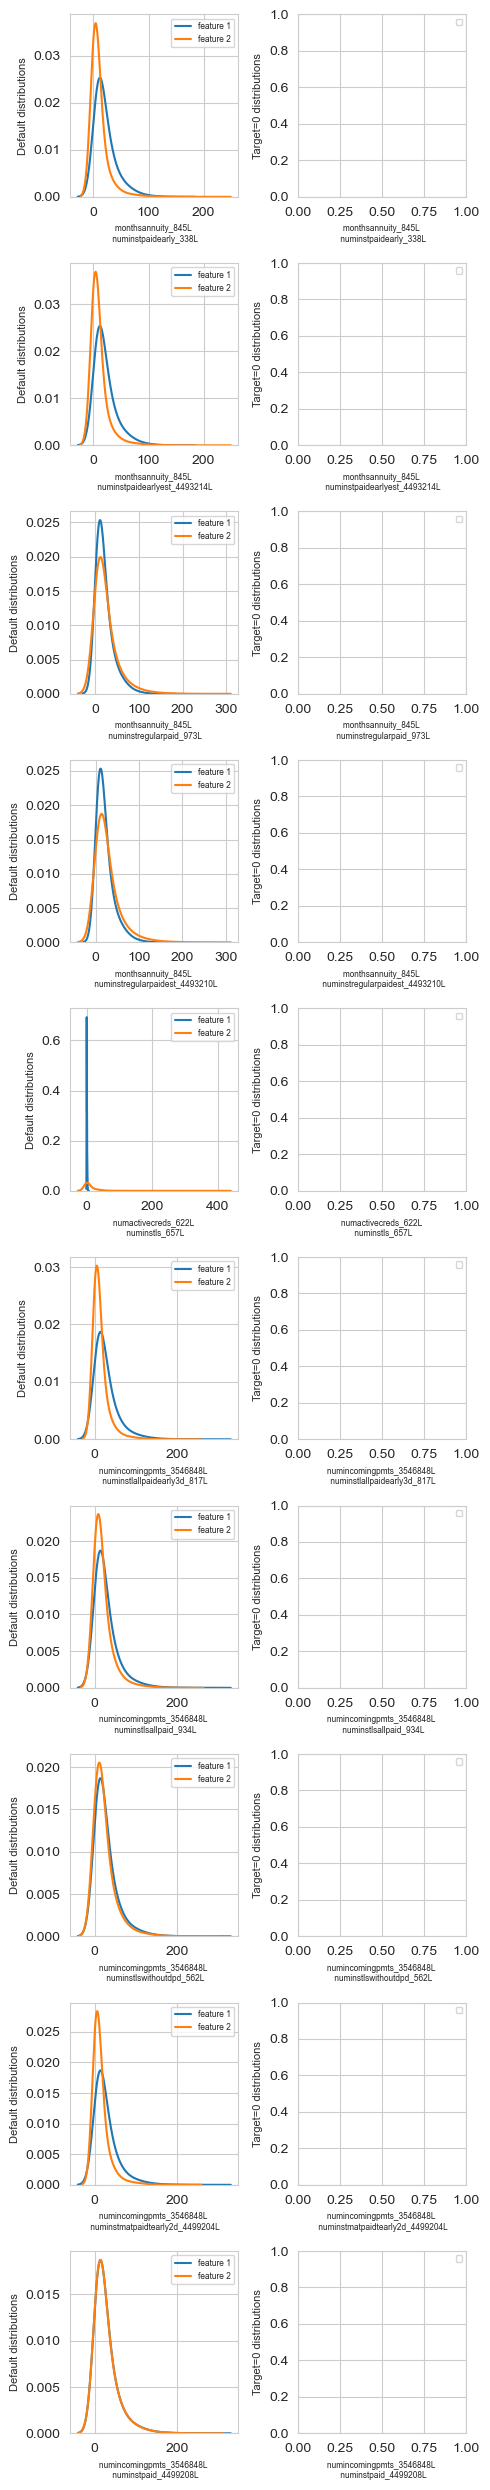

In [48]:
coco_list = []
for i in range(120, 130, 1):
    coco_list.append(table[i][0:2])

plot_distribution(static_df_1,coco_list)

C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1479: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1013: RuntimeWarning: invalid value encountered in scalar divide
  result = sqr.sum(axis=axis, dtype=np.float64) / d
C:\Users\0913h\AppData\Local\Temp\ipykernel_11416\3455539233.py:30: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(t0[feature], bw_method=0.5, label = 'feature %i' %j)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1479: RuntimeWarning: overflow encoun

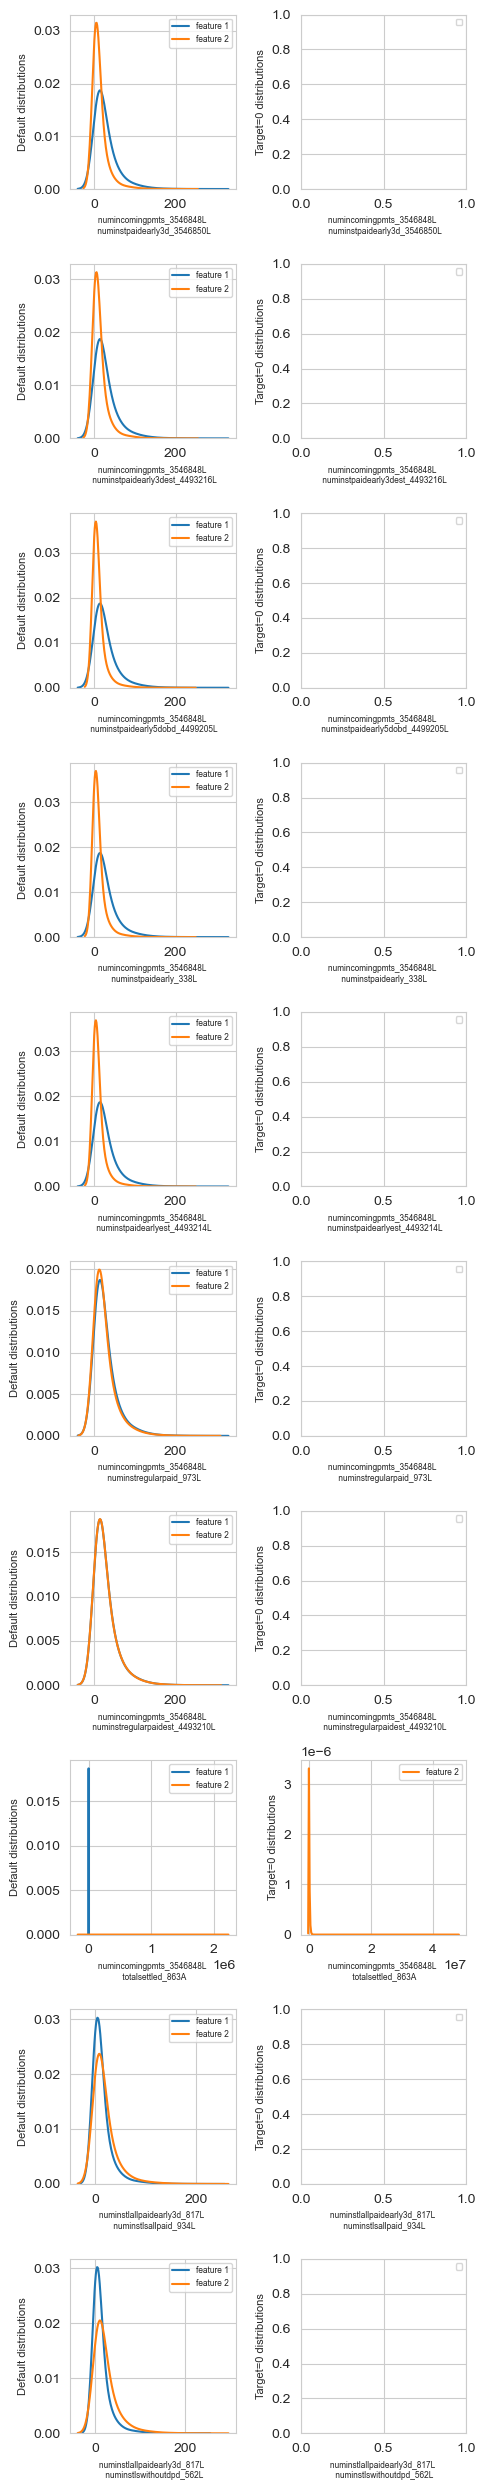

In [49]:
coco_list = []
for i in range(130, 140, 1):
    coco_list.append(table[i][0:2])

plot_distribution(static_df_1,coco_list)

C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1479: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1013: RuntimeWarning: invalid value encountered in scalar divide
  result = sqr.sum(axis=axis, dtype=np.float64) / d
C:\Users\0913h\AppData\Local\Temp\ipykernel_11416\3455539233.py:30: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(t0[feature], bw_method=0.5, label = 'feature %i' %j)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1479: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = 

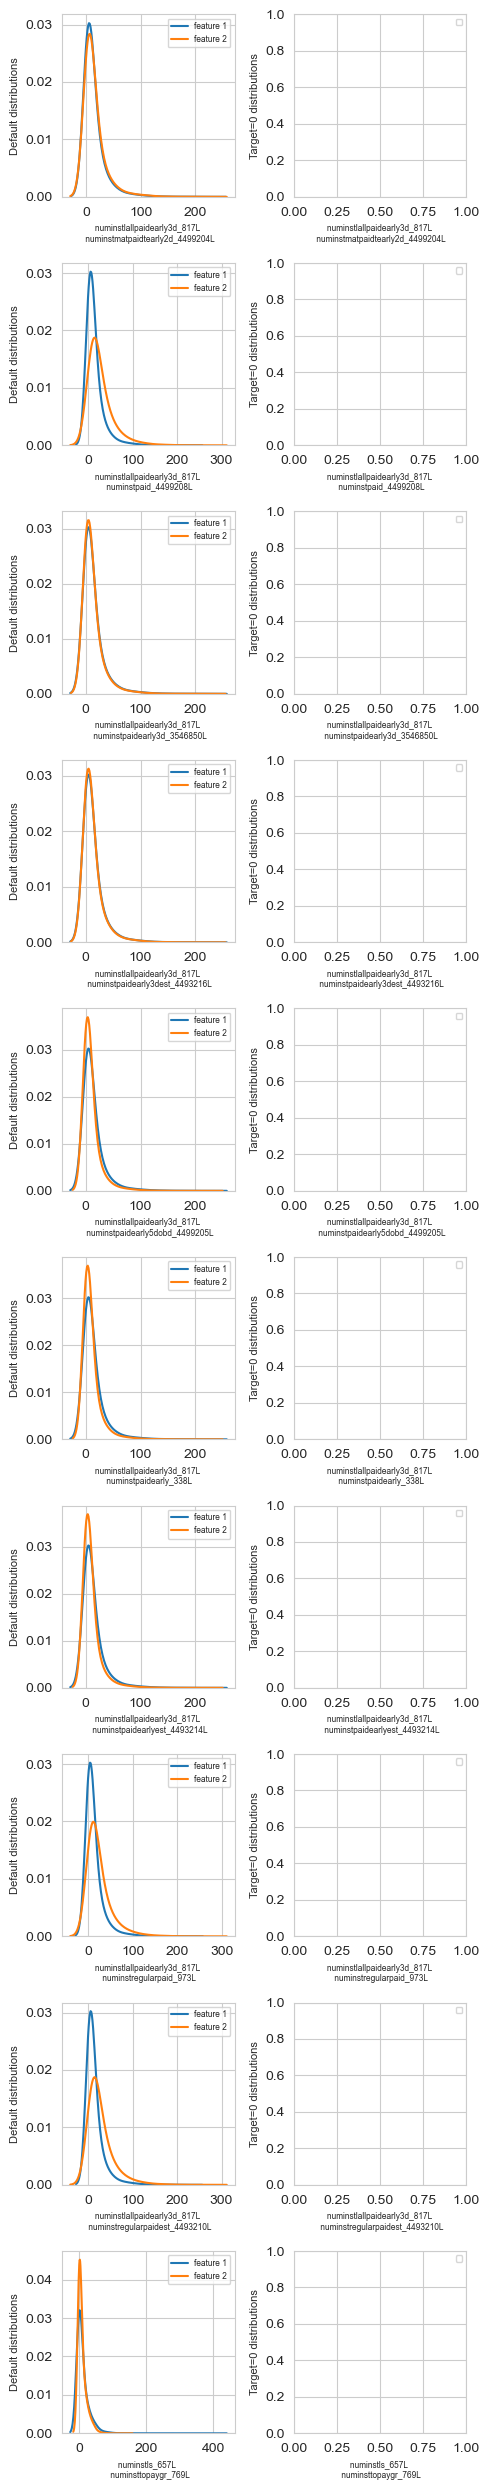

In [50]:
coco_list = []
for i in range(140, 150, 1):
    coco_list.append(table[i][0:2])

plot_distribution(static_df_1,coco_list)

C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1479: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1013: RuntimeWarning: invalid value encountered in scalar divide
  result = sqr.sum(axis=axis, dtype=np.float64) / d
C:\Users\0913h\AppData\Local\Temp\ipykernel_11416\3455539233.py:30: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(t0[feature], bw_method=0.5, label = 'feature %i' %j)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1479: RuntimeWarning: overflow encoun

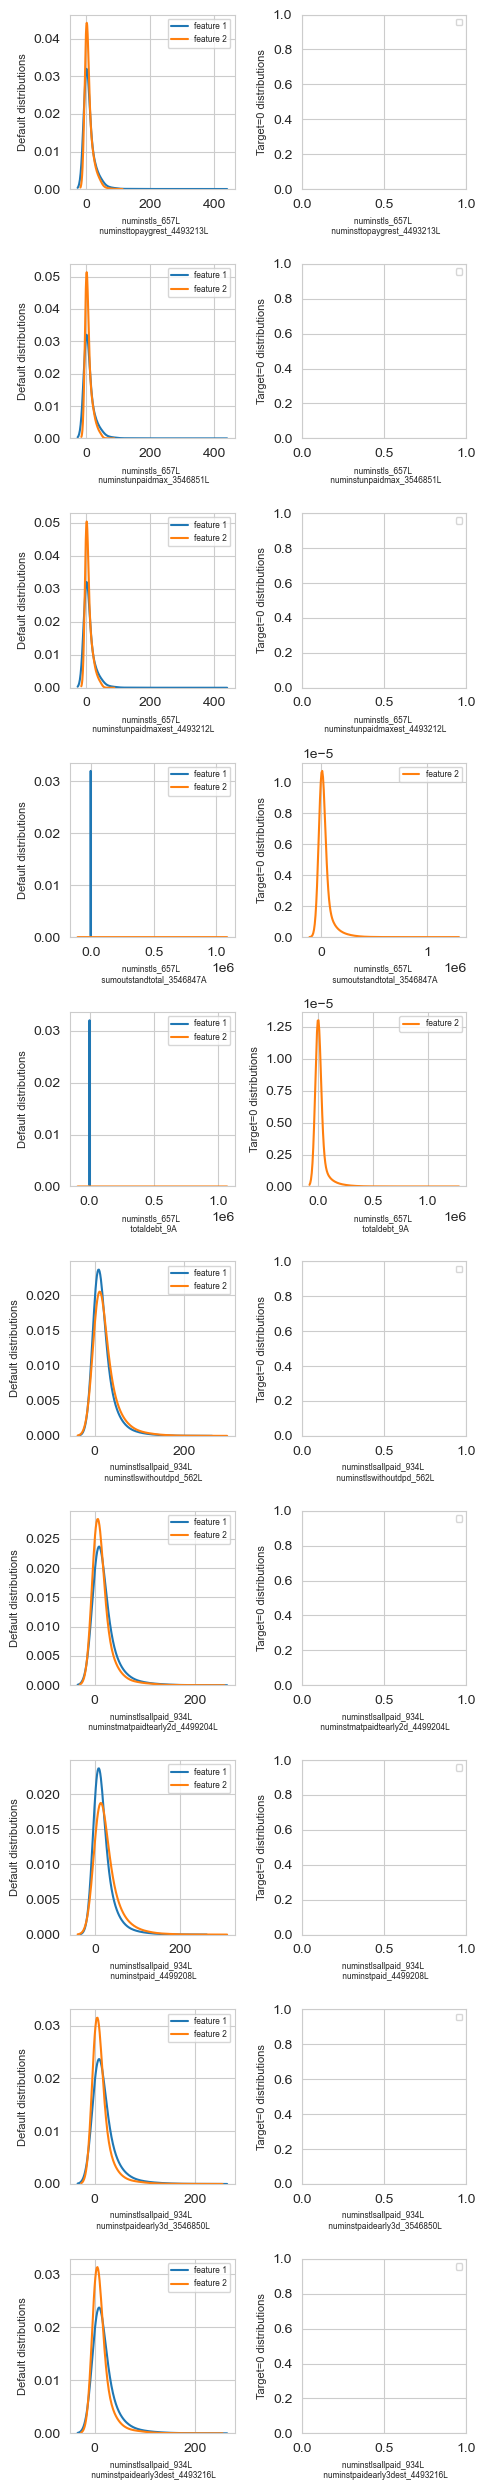

In [51]:
coco_list = []
for i in range(150, 160, 1):
    coco_list.append(table[i][0:2])

plot_distribution(static_df_1,coco_list)

C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1479: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1013: RuntimeWarning: invalid value encountered in scalar divide
  result = sqr.sum(axis=axis, dtype=np.float64) / d
C:\Users\0913h\AppData\Local\Temp\ipykernel_11416\3455539233.py:30: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(t0[feature], bw_method=0.5, label = 'feature %i' %j)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1479: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = 

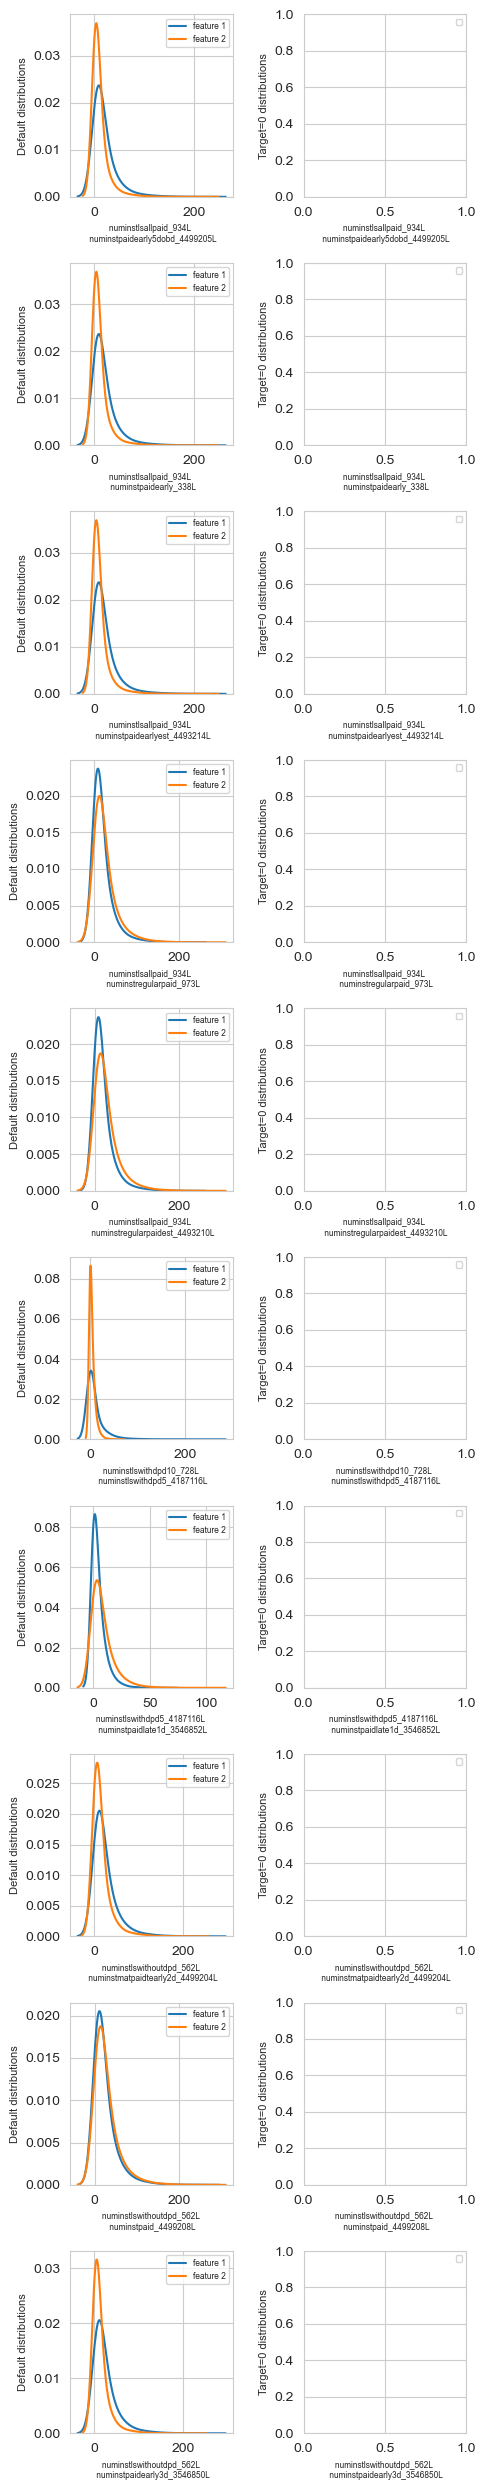

In [52]:
coco_list = []
for i in range(160, 170, 1):
    coco_list.append(table[i][0:2])

plot_distribution(static_df_1,coco_list)

C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1479: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1013: RuntimeWarning: invalid value encountered in scalar divide
  result = sqr.sum(axis=axis, dtype=np.float64) / d
C:\Users\0913h\AppData\Local\Temp\ipykernel_11416\3455539233.py:30: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(t0[feature], bw_method=0.5, label = 'feature %i' %j)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1479: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = 

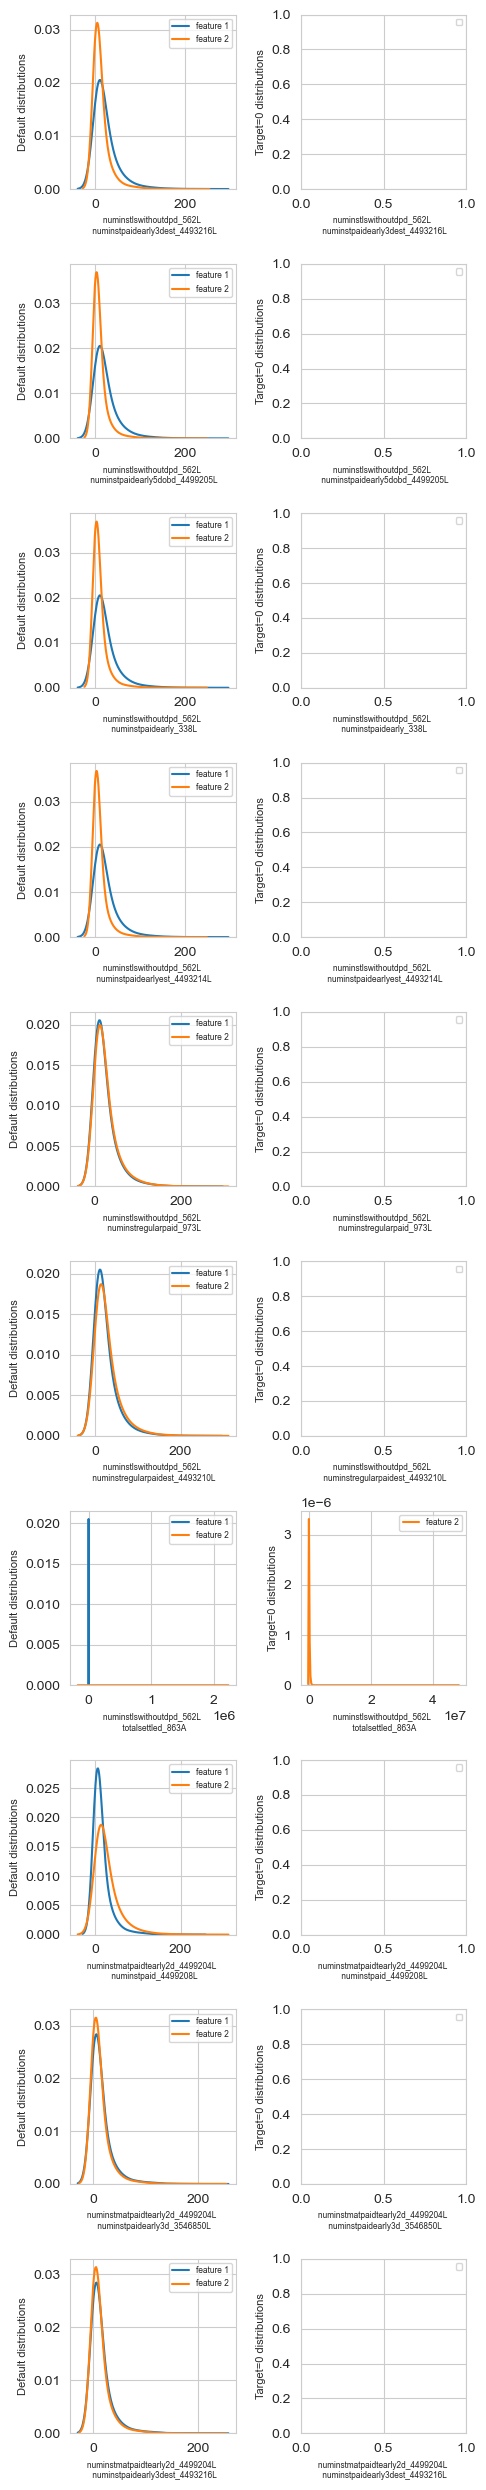

In [53]:
coco_list = []
for i in range(170, 180, 1):
    coco_list.append(table[i][0:2])

plot_distribution(static_df_1,coco_list)

C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1479: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1013: RuntimeWarning: invalid value encountered in scalar divide
  result = sqr.sum(axis=axis, dtype=np.float64) / d
C:\Users\0913h\AppData\Local\Temp\ipykernel_11416\3455539233.py:30: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(t0[feature], bw_method=0.5, label = 'feature %i' %j)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1479: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = 

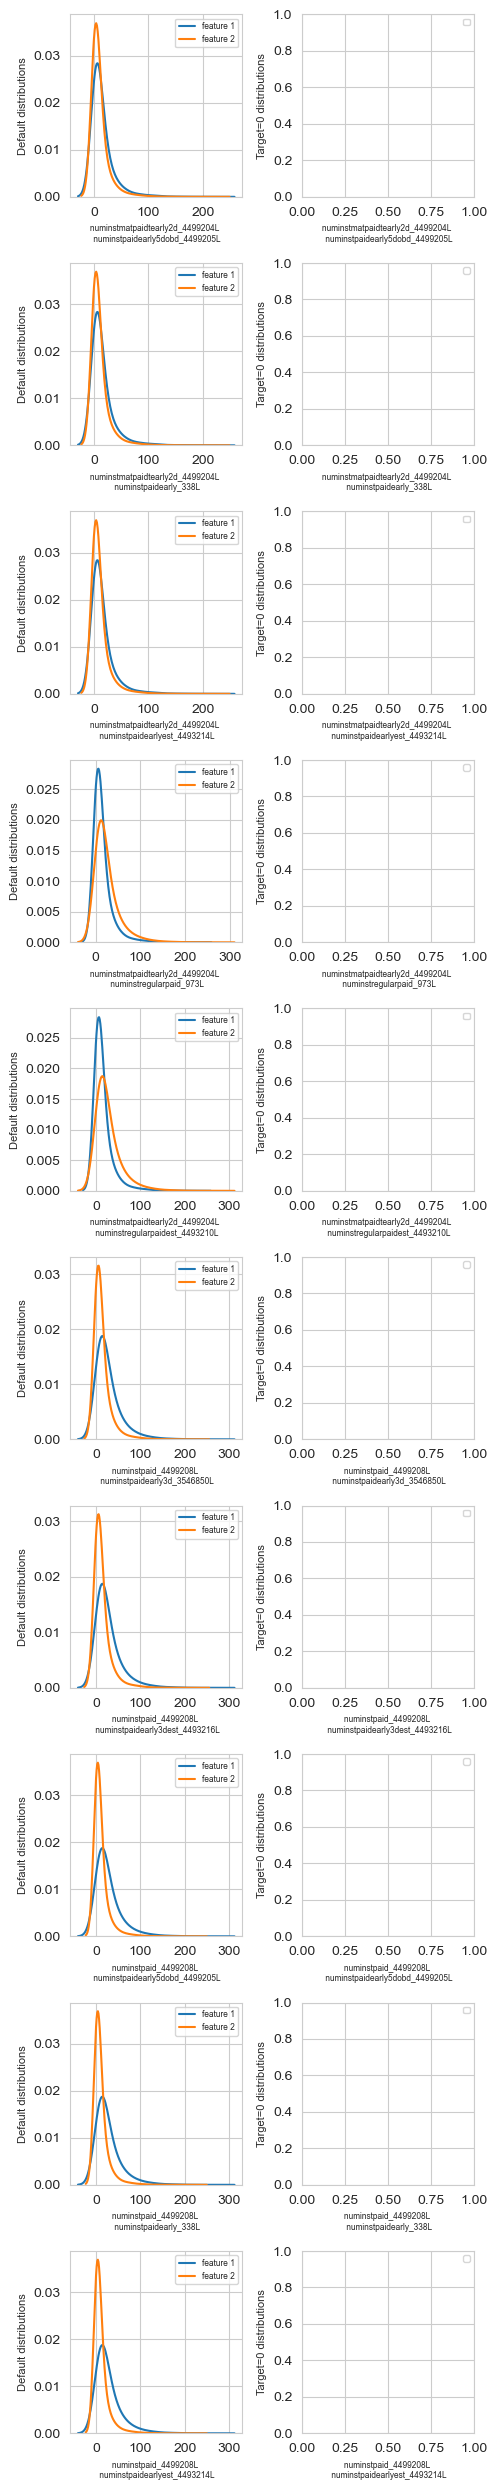

In [54]:
coco_list = []
for i in range(180, 190, 1):
    coco_list.append(table[i][0:2])

plot_distribution(static_df_1,coco_list)

C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1479: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1013: RuntimeWarning: invalid value encountered in scalar divide
  result = sqr.sum(axis=axis, dtype=np.float64) / d
C:\Users\0913h\AppData\Local\Temp\ipykernel_11416\3455539233.py:30: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(t0[feature], bw_method=0.5, label = 'feature %i' %j)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1479: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = 

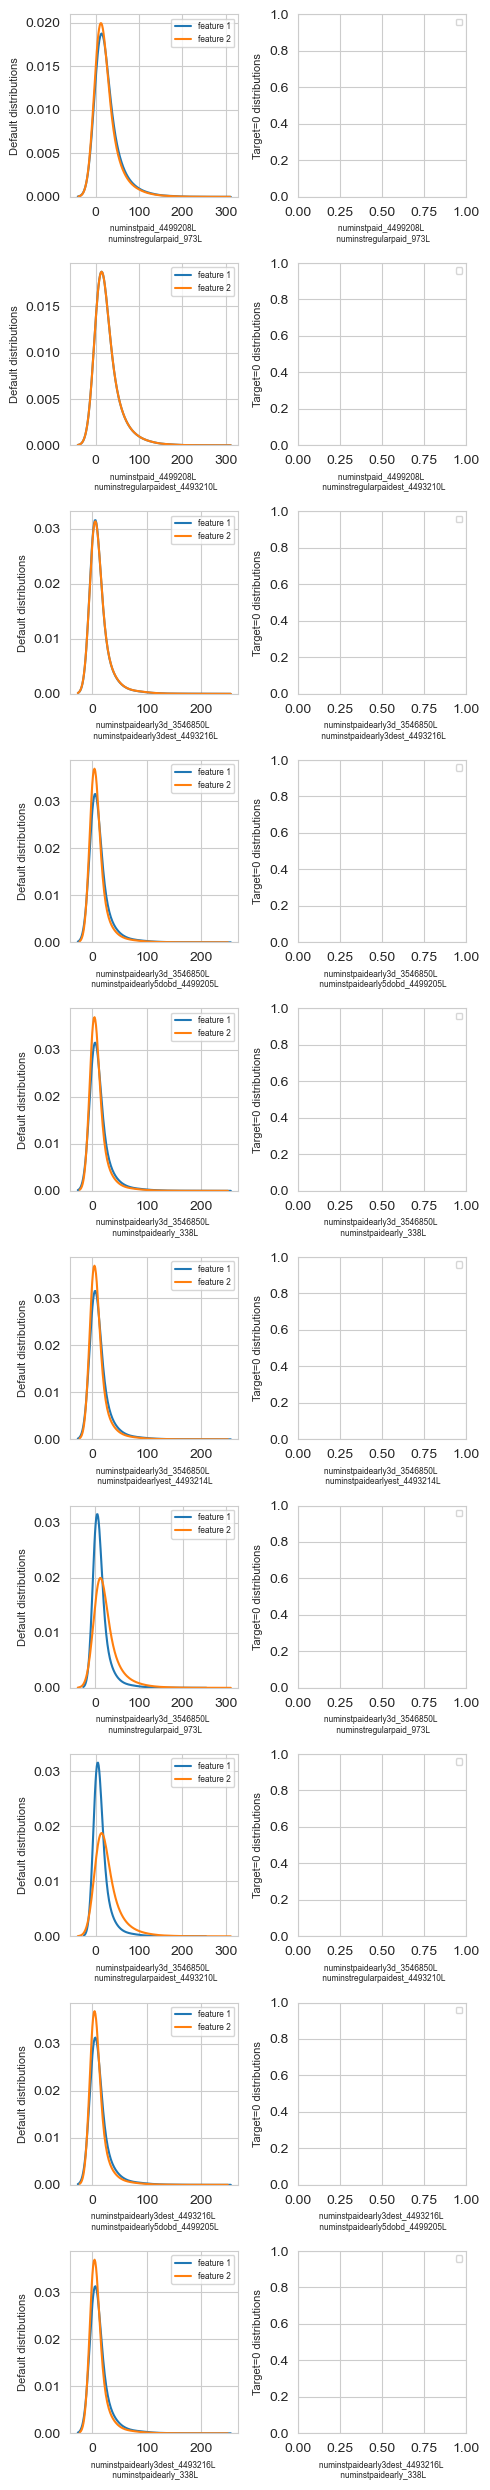

In [55]:
coco_list = []
for i in range(190, 200, 1):
    coco_list.append(table[i][0:2])

plot_distribution(static_df_1,coco_list)

C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1479: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1013: RuntimeWarning: invalid value encountered in scalar divide
  result = sqr.sum(axis=axis, dtype=np.float64) / d
C:\Users\0913h\AppData\Local\Temp\ipykernel_11416\3455539233.py:30: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(t0[feature], bw_method=0.5, label = 'feature %i' %j)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1479: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = 

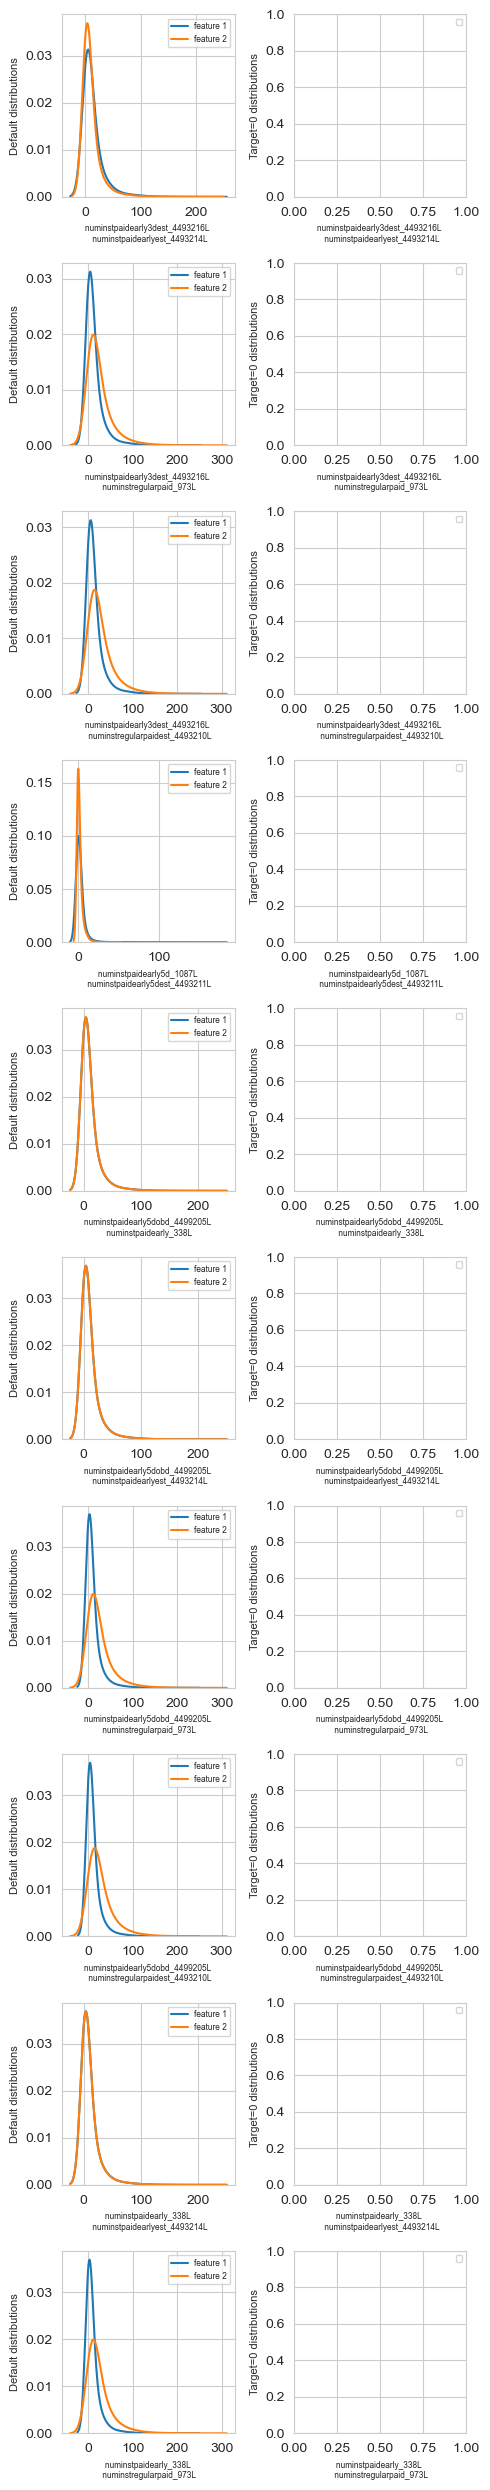

In [56]:
coco_list = []
for i in range(200,210, 1):
    coco_list.append(table[i][0:2])

plot_distribution(static_df_1,coco_list)

C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1479: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1013: RuntimeWarning: invalid value encountered in scalar divide
  result = sqr.sum(axis=axis, dtype=np.float64) / d
C:\Users\0913h\AppData\Local\Temp\ipykernel_11416\3455539233.py:30: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(t0[feature], bw_method=0.5, label = 'feature %i' %j)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1479: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = 

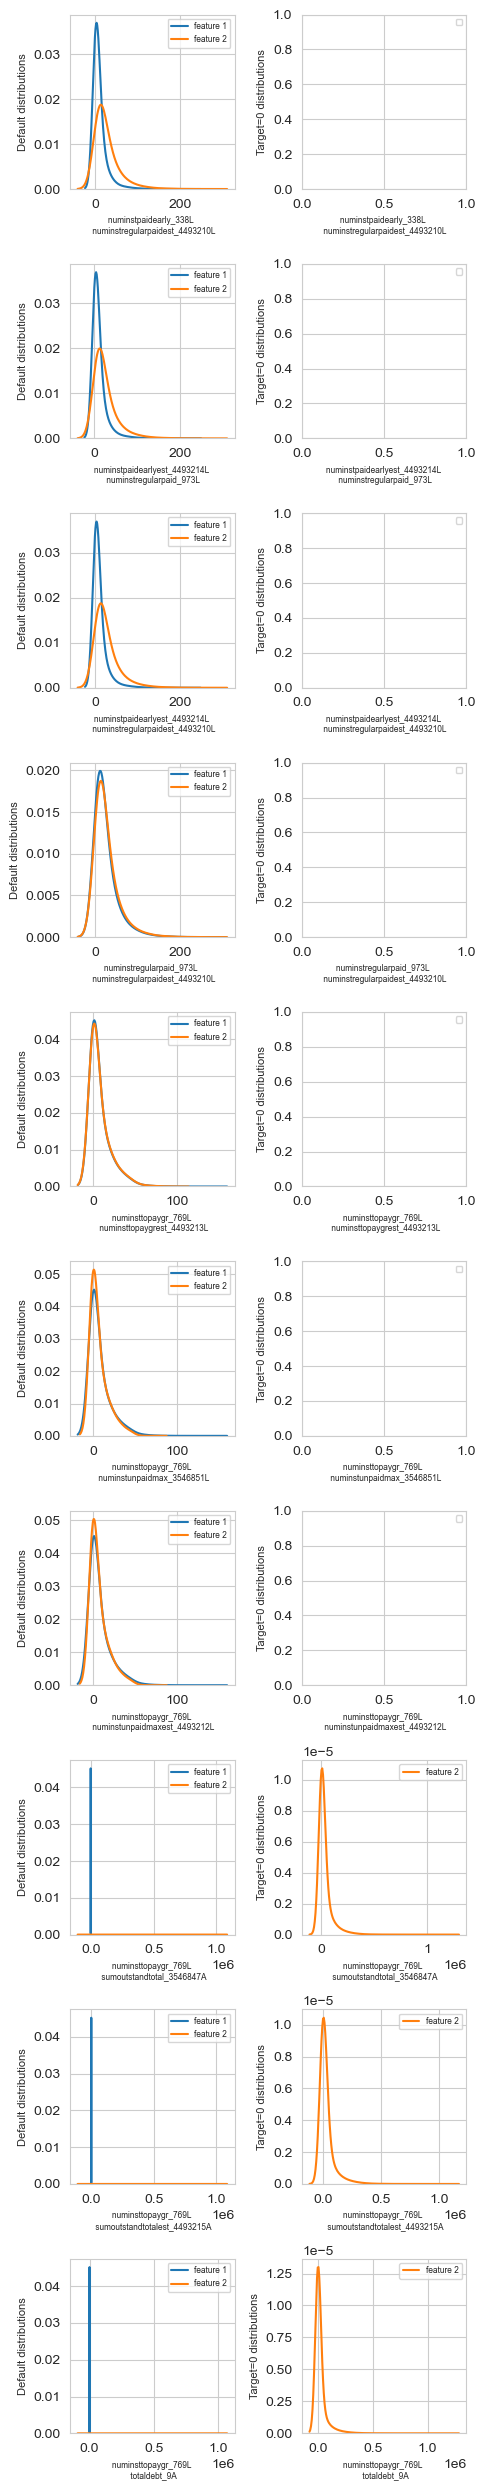

In [57]:
coco_list = []
for i in range(210, 220, 1):
    coco_list.append(table[i][0:2])

plot_distribution(static_df_1,coco_list)

C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1479: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\Users\0913h\AppData\Local\Temp\ipykernel_11416\3455539233.py:30: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(t0[feature], bw_method=0.5, label = 'feature %i' %j)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1479: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\Users\0913h\AppData\Local\Temp\ipykernel_11416\3455539233.py:30: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(t0[feature], bw_method=0.5, label = 'feature %i' %j)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.p

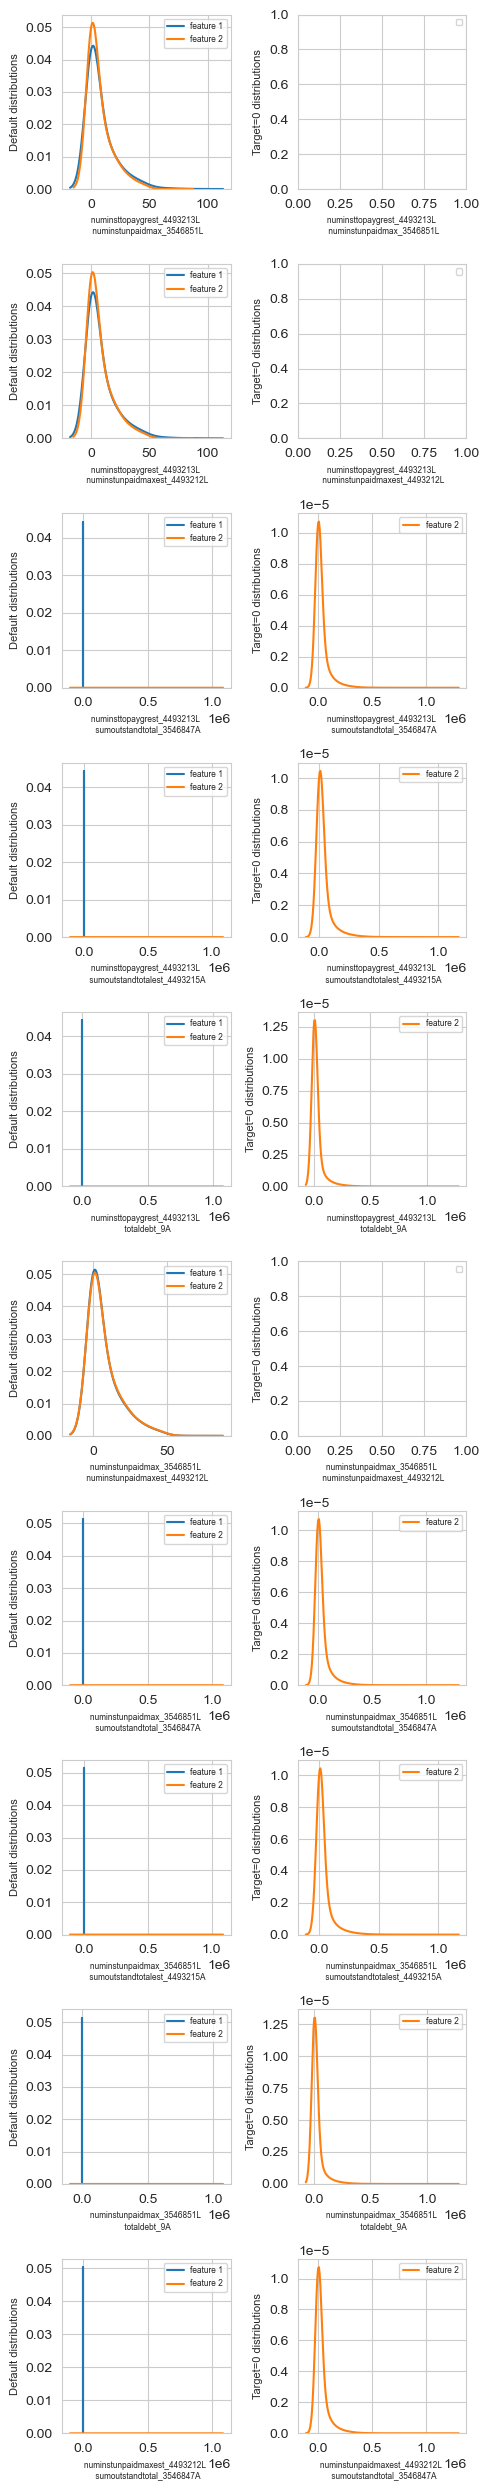

In [58]:
coco_list = []
for i in range(220, 230, 1):
    coco_list.append(table[i][0:2])

plot_distribution(static_df_1,coco_list)

C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1479: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\Users\0913h\AppData\Local\Temp\ipykernel_11416\3455539233.py:30: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(t0[feature], bw_method=0.5, label = 'feature %i' %j)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1479: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\Users\0913h\AppData\Local\Temp\ipykernel_11416\3455539233.py:30: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(t0[feature], bw_method=0.5, label = 'feature %i' %j)
C:\Users\0913h\anaconda3\Lib\site-packages\pandas\core\nanops.py:1479: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\Users\0913h\AppData\Local\Temp\ipykernel_11416\3455539233.py:30: UserWarning: 

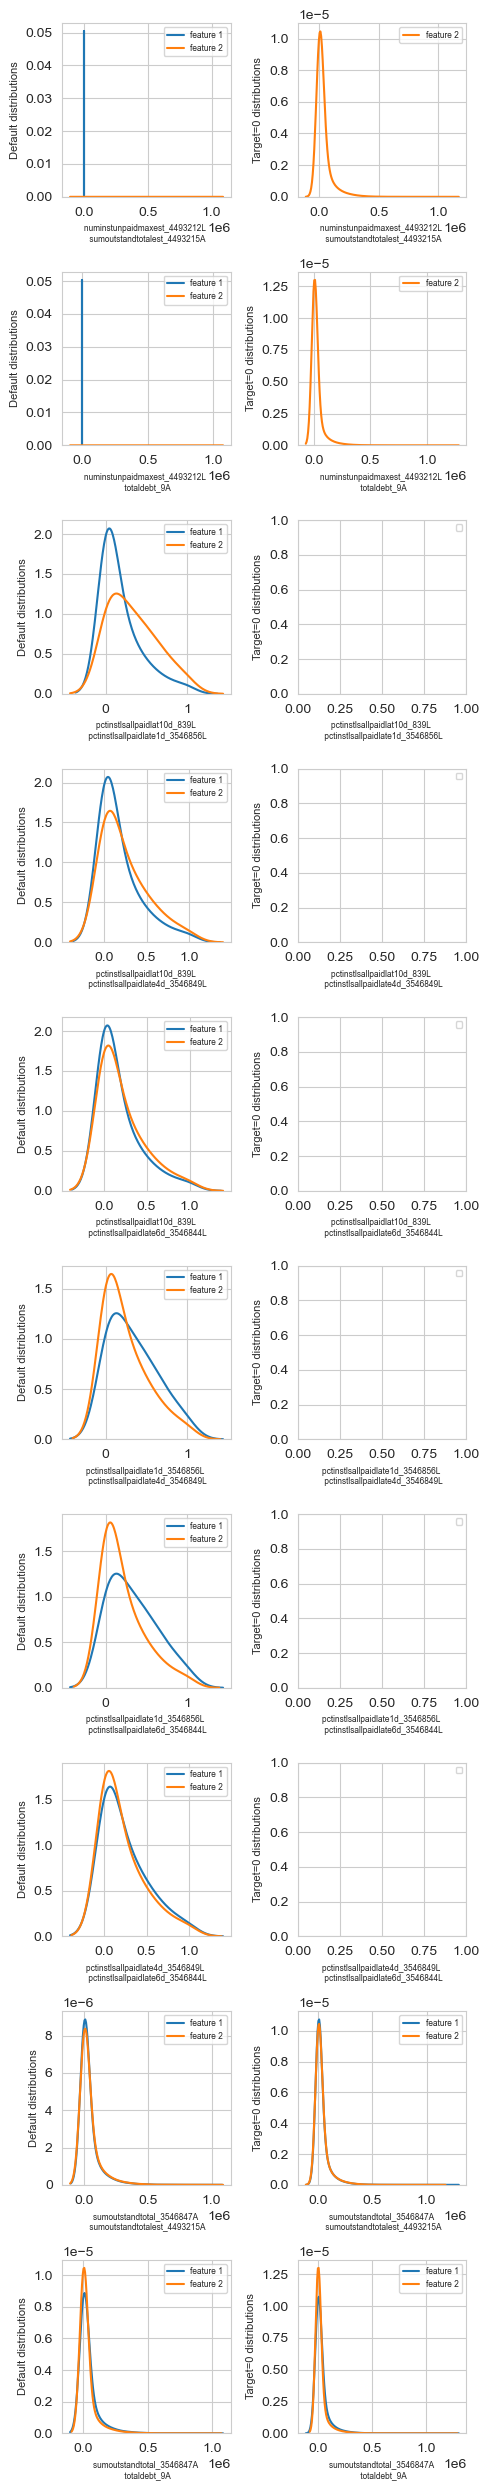

In [59]:
coco_list = []
for i in range(230, 240, 1):
    coco_list.append(table[i][0:2])

plot_distribution(static_df_1,coco_list)

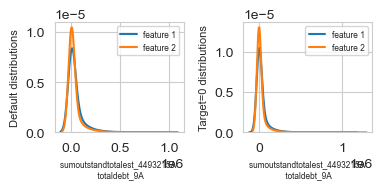

In [60]:
# last correlated features list
coco_list = []
coco_list.append(table[-1][0:2])
# plot
t1 = static_df_1.loc[static_df_1['target'] != 0]
t0 = static_df_1.loc[static_df_1['target'] == 0]

sns.set_style('whitegrid')
fig, ax = plt.subplots(1, 2, figsize=(4,2))

for feature_list in coco_list:
    plt.subplot(1, 2, 1)
    #plt.title(f"{feature_list[0]} \n {feature_list[1]}", fontsize = 8)
    plt.ylabel('Default distributions', fontsize=8)
    plt.xlabel(f"{feature_list[0]} \n {feature_list[1]}", fontsize = 6)
    j = 0
    for feature in feature_list:
        j += 1
        sns.kdeplot(t1[feature], bw_method=0.5, label = 'feature %i' %j)
    plt.legend(loc='upper right', fontsize = "6")

    plt.subplot(1, 2, 2)
    #plt.title(f"{feature_list[0]} \n {feature_list[1]}", fontsize = 8)
    plt.ylabel('Target=0 distributions', fontsize=8)
    plt.xlabel(f"{feature_list[0]} \n {feature_list[1]}", fontsize = 6)
    j = 0
    for feature in feature_list:
        j += 1
        sns.kdeplot(t0[feature], bw_method=0.5, label = 'feature %i' %j)
    plt.legend(loc='upper right', fontsize = "6")

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

In [29]:
np.shape(table)

(241, 3)

## Correlation between categorical features

In [ ]:
# Categorical columns
static_cat_cols = static_df.columns
static_df.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns.tolist()